-------------------
-------------------
## **Grading Note**: 
## ---------- STOP: DON'T RUN! READ ONLY!! ----------
### Use the grading_document.ipynb to run the trained model and get results in under 5 minutes!
### This .ipynb trains and takes 4-5 days to run, this shows the EDA, training, and analysis throughout the process.
### Feel free to run it, but be prepared to wait a while. If you press run all, all of the cells will run and their results will dissapear until they re-run in full.
## ---------- STOP: DON'T RUN! READ ONLY!! ----------

-------------------
-------------------

## **Author and Other Info**: 
Alejandro Scaffa

Final Project 

Apr 22 2025


## **Title**: 
# Cancer Prediction Model (Binary and Multiclass) Trained on TCGA PANCAN Dataset
## **Outline**: 
#### This Project has 4 parts: Part 1 is the EDA for the Genomic Dataset, Part 2 is the ML Pipeline needed to get the data in order to train the models, Part 3 is the ML Pipeline to train and select the binary classification model, and Part 4 is the ML Pipeline to train and select the multiclass classification model.



#### **Part 1: EDA for PANCAN Genomic Data**
#### 1A - EDA - Genomic Data Clean Up And Analysis
#### 1B - EDA - Metadata Clean Up And Analysis
#### 1C - EDA - Merging the Dataset of Genomic Data and Metadata

  -
#### **Part 2: ML Pipeline PreRequisites for PANCAN Genomic Data**
#### Part 2A - ML Pipeline - Variance Selection
#### Part 2B - ML Pipeline - Finding the Best Off-Shelf Model for Binary Prediction
#### Part 2C - ML Pipeline - Finding the Best Off-Shelf Model for Multiclass Prediction
#### Part 2D - ML Pipeline - Metric Results for Binary and Multiclass Prediction Off the Shelf Models
#### Part 2E - ML Pipeline - Train Test Split and Data Scaling

  -
#### **Part 3: ML Pipeline for Binary Classifier Training and Evaluation**
#### Part 3A - Binary Classifier - Hyperparameter Tuning
#### Part 3B - Binary Classifier - Metric Results for Hyperparameter Tuning
#### Part 3C - Binary Classifier - Stacking Classifier Training and Metrics
#### Part 3D - Binary Classifier - Stacking Classifier Evaluation

  -
#### **Part 4: ML Pipeline for Multiclass Classifier Training and Evaluation**
#### Part 4A - Multiclass Classifier - Hyperparameter Tuning
#### Part 4A - Multiclass Classifier - Metric Results for Hyperparameter Tuning
#### Part 4A - Multiclass Classifier - Stacking Classifier Training and Metrics
#### Part 4A - Multiclass Classifier - Stacking Classifier Evaluation


## **What it Does**: 
#### This code is a machine learning model that predicts whether a patient has cancer based on their genomic data. The model is trained on a dataset called PANCAN (Pan-cancer 33 types, >10000 patients) and uses a variety of features to make predictions. The model is evaluated using accuracy, precision, recall, and F1 score. The model being shown here is the result from the search of the best models using gridsearch and cross validation. The result is a stacking model of logistics regression with XGBoost and has a 99% accuracy for binary cancer classification and 97.6% accuracy for multiclass cancer classification.

--------------------
--------------------


## **Part 1: EDA for PANCAN Genomic Data**
#### 1A - EDA - Genomic Data Clean Up And Analysis
#### 1B - EDA - Metadata Clean Up And Analysis
#### 1C - EDA - Merging the Dataset of Genomic Data and Metadata


--------------------
## Part 1A - EDA - Genomic Data Clean Up and Analysis

### Download the PANCAN dataset from the TCGA database or from the freely accesible link below:
https://drive.google.com/file/d/15YmaYBbs46FUAVjw862FUonVy-TnwdJg/view?usp=sharing

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: read the first 50000 rows of the dataset
df = pd.read_csv('EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena.gz', 
                    compression='gzip', 
                    sep='\t')

#Step 2: print info and describe of the data 
print('---------------------INFO AND DESCRIBE OF THE GENOMIC DATASET---------------------------')

print(df.info())
print(df.describe())
print(df.shape)



---------------------INFO AND DESCRIBE OF THE GENOMIC DATASET---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20531 entries, 0 to 20530
Columns: 11070 entries, sample to TCGA-CG-4477-01
dtypes: float64(11069), object(1)
memory usage: 1.7+ GB
None
       TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01  TCGA-OR-A5J5-01  \
count     20531.000000     20531.000000     20531.000000     20531.000000   
mean          6.075798         6.239024         6.252262         6.469181   
std           4.165406         4.126370         4.141135         4.039558   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.770000         2.080000         2.190000         2.850000   
50%           7.040000         7.290000         7.220000         7.530000   
75%           9.620000         9.660000         9.640000         9.660000   
max          18.730000        18.740000        18.670000        18.430000   

       TCGA-OR-A5J6-01  TCGA-O

In [155]:
print('---------------------SHAPE OF THE GENOMIC DATASET---------------------------')
#number of rows and columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
print('------------------------------------------------')

---------------------SHAPE OF THE GENOMIC DATASET---------------------------
Number of rows: 20531
Number of columns: 11070
------------------------------------------------


In [156]:
#Step 2.1: print first 5 column names
print('-----------COLUMNS 5-------------')
print(df.columns[:5])
#Step 2.2: print first 5 rows
print('-----------HEAD 3-------------')
print(df.head(3))

-----------COLUMNS 5-------------
Index(['sample', 'TCGA-OR-A5J1-01', 'TCGA-OR-A5J2-01', 'TCGA-OR-A5J3-01',
       'TCGA-OR-A5J5-01'],
      dtype='object')
-----------HEAD 3-------------
      sample  TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01  \
0  100130426             0.00             0.00             0.00   
1  100133144             2.09             1.88             1.45   
2  100134869             2.30             3.32             2.92   

   TCGA-OR-A5J5-01  TCGA-OR-A5J6-01  TCGA-OR-A5J7-01  TCGA-OR-A5J8-01  \
0             0.00             0.00             0.00             0.00   
1             0.00             0.00             1.12             1.29   
2             1.35             2.45             2.82             1.72   

   TCGA-OR-A5J9-01  TCGA-OR-A5JA-01  ...  TCGA-CG-4449-01  TCGA-CG-4462-01  \
0             0.00             0.00  ...              NaN              NaN   
1             0.00             2.45  ...             2.42             2.74   
2             1.

In [157]:
#Step 2.3: print a 4 column by 4 row sample
print('---------------4 ROWS 4 COLUMNS-------------------')
print(df.iloc[:4, :4]) 

---------------4 ROWS 4 COLUMNS-------------------
      sample  TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01
0  100130426             0.00             0.00             0.00
1  100133144             2.09             1.88             1.45
2  100134869             2.30             3.32             2.92
3      10357             7.23             6.36             6.45


### The Data is Formatted Like This: 
```
sample(gene ID) '\t' gene1'\t' gene2 '\t' gene3 '\t' gene4 
id1
id2
id3
id4

The values for each cell are the expression values of that gene (row) in the sample (column) in a log2 scale
```

In [158]:
print('---------------DEADLING WITH NULL VALUES-------------------')

#Note: I'm leaving this for reproducibility, I handling the nulls after merging of the data with the metadata!
#Step 3: check or nulls
null_count = df.isnull().sum()
null_count_per_column = null_count[null_count > 0]
print(f'Null values in the dataset per column:\n{null_count_per_column}')



---------------DEADLING WITH NULL VALUES-------------------
Null values in the dataset per column:
TCGA-EJ-A65B-01    1443
TCGA-EJ-A65D-01    1443
TCGA-FC-A66V-01    1443
TCGA-FC-A6HD-01    1443
TCGA-G9-6347-01    1443
                   ... 
TCGA-CG-4472-01    3766
TCGA-CG-4474-01    3766
TCGA-CG-4475-01    3766
TCGA-CG-4476-01    3766
TCGA-CG-4477-01    3766
Length: 1751, dtype: int64


In [159]:
#Step 4: count the number rows with null values
rows_with_nulls = df[df.isnull().any(axis=1)]
print(f'Number of rows with null values: {len(rows_with_nulls)}')

#Step 5: count the number of columns with null values
columns_with_nulls = df.columns[df.isnull().any()]
print(f'Number of columns with null values: {len(columns_with_nulls)}')

Number of rows with null values: 4196
Number of columns with null values: 1751


In [160]:
#Step: Inputing the null values as Zeroes BECAUSE NAN IN THIS DATASET MEANS TOO LOW TO DETECT!!!
df.fillna(0, inplace=True)


#Step: Verify
null_count_after_fill = df.isnull().sum()
null_count_after_fill_per_column = null_count_after_fill[null_count_after_fill > 0]
if len(null_count_after_fill_per_column) == 0:
    print("All null values have been successfully replaced with 0s.")
else:  
    print(f'Some null values still exist in the dataset')

All null values have been successfully replaced with 0s.


In [161]:
print('---------------DEADLING WITH DUPLICATE VALUES-------------------')

#Step 4: check for duplicates in gene ids, which are in the first column
first_column = df.columns[0]
duplicated_gene_names = df[first_column].duplicated().sum()
print(f'Duplicated gene names: {duplicated_gene_names}')

#Step 5: check for duplicates in the dataset as a whole
duplicated_rows = df.duplicated().sum()
print(f'Duplicated rows in the dataset: {duplicated_rows}')

#Step 6: check for duplicated columns
duplicated_columns = df.columns[df.columns.duplicated()]
print(f'Duplicated columns in the dataset: {duplicated_columns}')


---------------DEADLING WITH DUPLICATE VALUES-------------------
Duplicated gene names: 1
Duplicated rows in the dataset: 0
Duplicated columns in the dataset: Index([], dtype='object')


In [164]:
#Step 7: print duplicate ids:
duplicate_id_names = df[df.duplicated(subset=[first_column], keep=False)]
print(f'Duplicate gene names:\n{duplicate_id_names}')

#Step: Deal with duplicate gene name SLC35E2 by keeping them both and add version 1 and version 2 for them. 
#The issue with removing the duplicate is that this gene is particularly useful for determining ECC 
#cancer types, so instead of averaging, keep both, and see if they survive dimensionality reduction.
if df.loc[16301, 'sample'] == 'SLC35E2' and df.loc[16302, 'sample'] == 'SLC35E2':
    df.loc[16301, 'sample'] = 'SLC35E2_v1'
    df.loc[16302, 'sample'] = 'SLC35E2_v2'
    print('------------------')
    print('Duplicate gene names SLC35E2 have been renamed to SLC35E2_1 and SLC35E2_2')
    

Duplicate gene names:
Empty DataFrame
Columns: [sample, TCGA-OR-A5J1-01, TCGA-OR-A5J2-01, TCGA-OR-A5J3-01, TCGA-OR-A5J5-01, TCGA-OR-A5J6-01, TCGA-OR-A5J7-01, TCGA-OR-A5J8-01, TCGA-OR-A5J9-01, TCGA-OR-A5JA-01, TCGA-OR-A5JB-01, TCGA-OR-A5JC-01, TCGA-OR-A5JD-01, TCGA-OR-A5JE-01, TCGA-OR-A5JF-01, TCGA-OR-A5JG-01, TCGA-OR-A5JI-01, TCGA-OR-A5JJ-01, TCGA-OR-A5JK-01, TCGA-OR-A5JL-01, TCGA-OR-A5JM-01, TCGA-OR-A5JO-01, TCGA-OR-A5JP-01, TCGA-OR-A5JQ-01, TCGA-OR-A5JR-01, TCGA-OR-A5JS-01, TCGA-OR-A5JT-01, TCGA-OR-A5JV-01, TCGA-OR-A5JW-01, TCGA-OR-A5JX-01, TCGA-OR-A5JY-01, TCGA-OR-A5JZ-01, TCGA-OR-A5K0-01, TCGA-OR-A5K1-01, TCGA-OR-A5K2-01, TCGA-OR-A5K3-01, TCGA-OR-A5K4-01, TCGA-OR-A5K5-01, TCGA-OR-A5K6-01, TCGA-OR-A5K8-01, TCGA-OR-A5K9-01, TCGA-OR-A5KO-01, TCGA-OR-A5KT-01, TCGA-OR-A5KU-01, TCGA-OR-A5KV-01, TCGA-OR-A5KW-01, TCGA-OR-A5KX-01, TCGA-OR-A5KY-01, TCGA-OR-A5KZ-01, TCGA-OR-A5L3-01, TCGA-OR-A5L4-01, TCGA-OR-A5L5-01, TCGA-OR-A5L6-01, TCGA-OR-A5L8-01, TCGA-OR-A5L9-01, TCGA-OR-A5LA-01, TCGA-OR-A

In [163]:

#print the lines 16301 and 16302, only 5 columns
print('------------------')
print(df.iloc[[16301, 16302]].iloc[:, :5])



------------------
           sample  TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01  \
16301  SLC35E2_v1            11.69             9.70            10.28   
16302  SLC35E2_v2             5.18             4.48             3.97   

       TCGA-OR-A5J5-01  
16301            10.19  
16302             3.01  


In [165]:
#Step: print duplicated gene names 
first_column = df.columns[0]
duplicate_gene_names_post = df[first_column].duplicated()
print(f'Duplicate gene names after renaming SCLC35E2, the only duplicated gene name: {duplicate_gene_names_post}')

Duplicate gene names after renaming SCLC35E2, the only duplicated gene name: 0        False
1        False
2        False
3        False
4        False
         ...  
20526    False
20527    False
20528    False
20529    False
20530    False
Name: sample, Length: 20531, dtype: bool


In [166]:
#Step: print the actual duplicated values in sample column
duplicate_id_names_post = df[df.duplicated(subset=[first_column], keep=False)]
print(f'Duplicate gene names after renaming SCLC35E2:\n{duplicate_id_names_post}')

Duplicate gene names after renaming SCLC35E2:
Empty DataFrame
Columns: [sample, TCGA-OR-A5J1-01, TCGA-OR-A5J2-01, TCGA-OR-A5J3-01, TCGA-OR-A5J5-01, TCGA-OR-A5J6-01, TCGA-OR-A5J7-01, TCGA-OR-A5J8-01, TCGA-OR-A5J9-01, TCGA-OR-A5JA-01, TCGA-OR-A5JB-01, TCGA-OR-A5JC-01, TCGA-OR-A5JD-01, TCGA-OR-A5JE-01, TCGA-OR-A5JF-01, TCGA-OR-A5JG-01, TCGA-OR-A5JI-01, TCGA-OR-A5JJ-01, TCGA-OR-A5JK-01, TCGA-OR-A5JL-01, TCGA-OR-A5JM-01, TCGA-OR-A5JO-01, TCGA-OR-A5JP-01, TCGA-OR-A5JQ-01, TCGA-OR-A5JR-01, TCGA-OR-A5JS-01, TCGA-OR-A5JT-01, TCGA-OR-A5JV-01, TCGA-OR-A5JW-01, TCGA-OR-A5JX-01, TCGA-OR-A5JY-01, TCGA-OR-A5JZ-01, TCGA-OR-A5K0-01, TCGA-OR-A5K1-01, TCGA-OR-A5K2-01, TCGA-OR-A5K3-01, TCGA-OR-A5K4-01, TCGA-OR-A5K5-01, TCGA-OR-A5K6-01, TCGA-OR-A5K8-01, TCGA-OR-A5K9-01, TCGA-OR-A5KO-01, TCGA-OR-A5KT-01, TCGA-OR-A5KU-01, TCGA-OR-A5KV-01, TCGA-OR-A5KW-01, TCGA-OR-A5KX-01, TCGA-OR-A5KY-01, TCGA-OR-A5KZ-01, TCGA-OR-A5L3-01, TCGA-OR-A5L4-01, TCGA-OR-A5L5-01, TCGA-OR-A5L6-01, TCGA-OR-A5L8-01, TCGA-OR-A5L9-01, TC

In [167]:
from collections import Counter
#Step: check for duplicate column names using counter to triple make sure!

column_counts = Counter(df.columns)
duplicates = [col for col, count in column_counts.items() if count > 1]

print("True duplicate column names:", duplicates)


True duplicate column names: []


In [168]:
#Step 7: checking if a known sample id from the metadata file is in the dataset before joining the dataset
#Note: The xena.gz file is a file that contains gene expression data for various patients, but does not 
#have any information about the patient or type of tumor that was sequenced
if ('TCGA-AJ-A3NH-01' in df.columns):
    print('TCGA-AJ-A3NH-01 is in the dataset meaning the dataset can be joined with the metadata file by the sample id')
else:
    print('TCGA-AJ-A3NH-01 is not in the dataset, ids cannot be joined with the metadata file by the sample id')


TCGA-AJ-A3NH-01 is in the dataset meaning the dataset can be joined with the metadata file by the sample id


------------------

## Part 1B - EDA - Metadata Clean Up And Analysis


In [171]:
#Step: read the metadata file
metadata = pd.read_csv('denseDataOnlyDownload.tsv',
                        sep='\t')

print('------------METADATA HEAD---------------')
print(metadata.head(3))


------------METADATA HEAD---------------
            sample          samples  gender  \
0  TCGA-BR-8486-01  TCGA-BR-8486-01  FEMALE   
1  TCGA-ND-A4WA-01  TCGA-ND-A4WA-01  FEMALE   
2  TCGA-NF-A5CP-01  TCGA-NF-A5CP-01  FEMALE   

   age_at_initial_pathologic_diagnosis        _primary_disease    sample_type  \
0                                 90.0  stomach adenocarcinoma  Primary Tumor   
1                                 90.0  uterine carcinosarcoma  Primary Tumor   
2                                 90.0  uterine carcinosarcoma  Primary Tumor   

  cancer type abbreviation  
0                     STAD  
1                      UCS  
2                      UCS  


In [172]:
print('------------METADATA INFO---------------')
print(metadata.info())

------------METADATA INFO---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12839 entries, 0 to 12838
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sample                               12839 non-null  object 
 1   samples                              12839 non-null  object 
 2   gender                               12591 non-null  object 
 3   age_at_initial_pathologic_diagnosis  12540 non-null  float64
 4   _primary_disease                     12804 non-null  object 
 5   sample_type                          12732 non-null  object 
 6   cancer type abbreviation             12591 non-null  object 
dtypes: float64(1), object(6)
memory usage: 702.3+ KB
None


In [173]:
print('------------METADATA DESCRIBE---------------')
print(metadata.describe())

print('------------METADATA SHAPE---------------')
print(metadata.shape)

#find rows with nulls/nan on them and print them 
print('------------METADATA NULLS---------------')
rows_with_nulls = metadata[metadata.isnull().any(axis=1)]
print(f'Number of rows with null values: {len(rows_with_nulls)}')


------------METADATA DESCRIBE---------------
       age_at_initial_pathologic_diagnosis
count                         12540.000000
mean                             59.391308
std                              14.344243
min                              10.000000
25%                              51.000000
50%                              61.000000
75%                              70.000000
max                              90.000000
------------METADATA SHAPE---------------
(12839, 7)
------------METADATA NULLS---------------
Number of rows with null values: 303


### THE FILE FORMAT OF METADATA DATASET
```
# sample \t samples \t gender \t age_at_initial_pathologic_diagnosis \t _primary_disease \t sample_type \t cancer type \t abbreviation
0 \t TCGA-BR-8486-01 \t TCGA-BR-8486-01 \t FEMALE \t 90.0 \t stomach adenocarcinoma \t Primary Tumor \t STAD  
```

In [174]:
print('------------METADATA NULLS----------')
print('------------METADATA NULL COUNT ----------')
null_count_metadata = metadata.isnull().sum()
print(null_count_metadata)

print('------------METADATA NULL COUNT PER COLUMN ----------')
null_count_per_column_metadata = null_count_metadata[null_count_metadata > 0]
print(null_count_per_column_metadata)



------------METADATA NULLS----------
------------METADATA NULL COUNT ----------
sample                                   0
samples                                  0
gender                                 248
age_at_initial_pathologic_diagnosis    299
_primary_disease                        35
sample_type                            107
cancer type abbreviation               248
dtype: int64
------------METADATA NULL COUNT PER COLUMN ----------
gender                                 248
age_at_initial_pathologic_diagnosis    299
_primary_disease                        35
sample_type                            107
cancer type abbreviation               248
dtype: int64


In [175]:
print('------------METADATA NULL COUNT PER ROW ----------')
null_count_per_row_metadata = metadata.isnull().sum(axis=1)
print(null_count_per_row_metadata)


------------METADATA NULL COUNT PER ROW ----------
0        0
1        0
2        0
3        0
4        0
        ..
12834    5
12835    5
12836    5
12837    5
12838    5
Length: 12839, dtype: int64


In [176]:
print('---------------DEALING WITH NULL VALUES-------------------')

#Step: drop any rows in their entirety with null values in the metadata file since imputing this is not smart 
metadata = metadata.dropna()

#Step: Verify
null_count_after_drop = metadata.isnull().sum()
null_count_after_drop_per_column = null_count_after_drop[null_count_after_drop > 0]

if len(null_count_after_drop_per_column) == 0:
    print("All null values have been successfully removed from the metadata.")
else:
    print(f'Some null values still exist in the metadata: {null_count_after_drop_per_column}')

---------------DEALING WITH NULL VALUES-------------------
All null values have been successfully removed from the metadata.


In [177]:
print('------------ UNIQUE IDS ----------')
ids_metadata = metadata['sample']
sequencing_ids = df.columns[1:]
duplicate_sequencing_ids = sequencing_ids[sequencing_ids.duplicated()]
duplicate_metadata_ids = ids_metadata[ids_metadata.duplicated()]
matching_ids = set(ids_metadata) & set(sequencing_ids)
print(f'Number of ids in metadata: {len(ids_metadata)}')
print(f'Number of ids in sequencing data: {len(sequencing_ids)}')
print(f'Number of duplicate ids in metadata: {len(duplicate_metadata_ids)}')
print(f'Number of duplicate ids in sequencing data: {len(duplicate_sequencing_ids)}')
print(f'Number of matching ids: {len(matching_ids)}')



------------ UNIQUE IDS ----------
Number of ids in metadata: 12536
Number of ids in sequencing data: 11069
Number of duplicate ids in metadata: 0
Number of duplicate ids in sequencing data: 0
Number of matching ids: 10963


In [178]:
print('------------METADATA DUPLICATED ROWS ----------')
duplicate_rows_metadata = metadata.duplicated().sum()
print(duplicate_rows_metadata)

------------METADATA DUPLICATED ROWS ----------
0


In [179]:
print('---------------DEADLING WITH DUPLICATE VALUES-------------------')
#are sample and samples column the same 
print('------------METADATA SAMPLE AND SAMPLES----------')
sample_column = metadata['sample']
samples_column = metadata['samples']
same = 0
not_same = 0
for i in range(len(sample_column)):
    if sample_column.iloc[i] == samples_column.iloc[i]:
        same += 1
    else:
        not_same += 1
        
print('Comparison of sample vs samples column')
print('Same:', same)
print('Not same:', not_same)


---------------DEADLING WITH DUPLICATE VALUES-------------------
------------METADATA SAMPLE AND SAMPLES----------
Comparison of sample vs samples column
Same: 12536
Not same: 0


In [180]:
#Step samples and sample are the same, so we are dropping the samples column
metadata.drop(columns=['samples'], inplace=True)

print('------------METADATA UNIQUE SAMPLE TYPES----------')
unique_sample_types = metadata['sample_type'].unique()
print(f'Unique sample types in the metadata file: {unique_sample_types}')

print('------------METADATA UNIQUE CANCERS by Abbreviation----------')
unique_cancers = metadata['cancer type abbreviation'].unique()
print(f'Unique cancer types in the metadata file: {unique_cancers}')

print('------------METADATA UNIQUE GENDER----------')
unique_gender = metadata['gender'].unique()
print(f'Uniuqe gender types: {unique_gender}')


------------METADATA UNIQUE SAMPLE TYPES----------
Unique sample types in the metadata file: ['Primary Tumor' 'Solid Tissue Normal'
 'Primary Blood Derived Cancer - Peripheral Blood' 'Metastatic'
 'Recurrent Tumor' 'Additional - New Primary' 'Additional Metastatic']
------------METADATA UNIQUE CANCERS by Abbreviation----------
Unique cancer types in the metadata file: ['STAD' 'UCS' 'UCEC' 'LIHC' 'READ' 'KIRC' 'BLCA' 'BRCA' 'COAD' 'HNSC'
 'SARC' 'SKCM' 'OV' 'THCA' 'LAML' 'KIRP' 'CESC' 'PAAD' 'LUAD' 'KICH'
 'ESCA' 'UVM' 'GBM' 'THYM' 'ACC' 'LUSC' 'PCPG' 'DLBC' 'MESO' 'CHOL' 'LGG'
 'PRAD' 'TGCT']
------------METADATA UNIQUE GENDER----------
Uniuqe gender types: ['FEMALE' 'MALE']


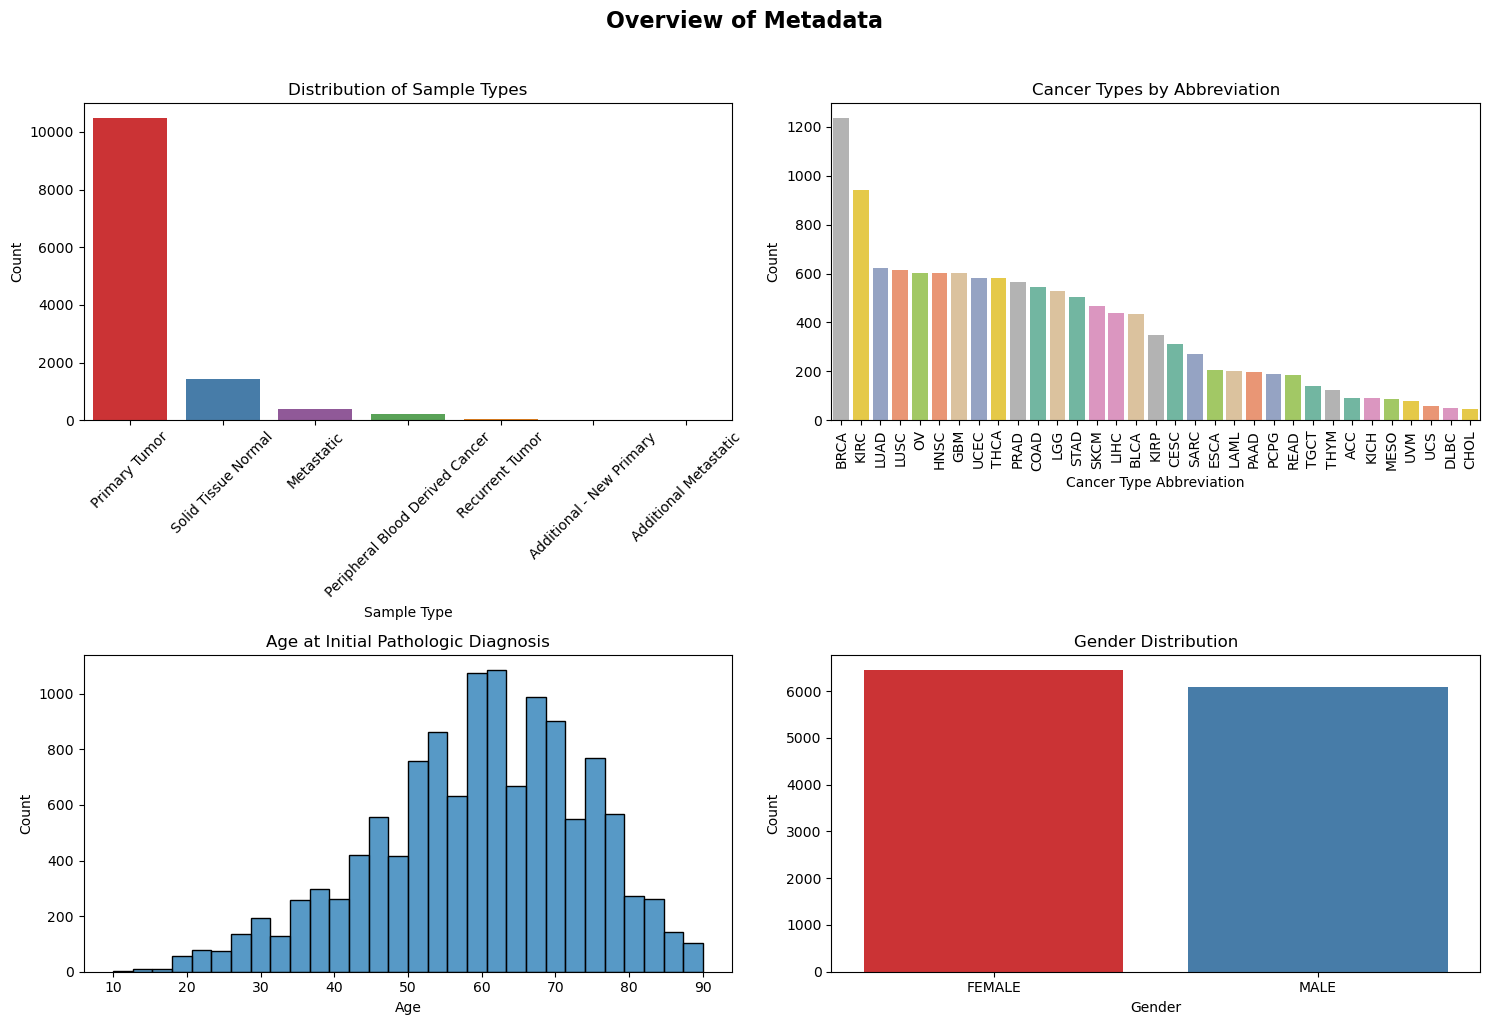

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#changing label of Primary Blood Derived Cancer - Peripheral Blood to Peripheral Blood Cancer so it does hit the graph below 
metadata['sample_type'] = metadata['sample_type'].replace(
    {'Primary Blood Derived Cancer - Peripheral Blood': 'Peripheral Blood Derived Cancer'})


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
#Step: Image the metadata to see distribution of sample types 
order_types = metadata['sample_type'].value_counts().index
sns.countplot(data=metadata, x='sample_type', order=order_types, ax=axes[0, 0], palette='Set1', hue='sample_type')
axes[0, 0].set_title('Distribution of Sample Types')
axes[0, 0].set_xlabel('Sample Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

#Step: Image the metadata to see distribution of unique cancer types by abbreviation 
order_cancer = metadata['cancer type abbreviation'].value_counts().index
sns.countplot(data=metadata, x='cancer type abbreviation', order=order_cancer, ax=axes[0, 1], palette='Set2', hue='cancer type abbreviation')
axes[0, 1].set_title('Cancer Types by Abbreviation')
axes[0, 1].set_xlabel('Cancer Type Abbreviation')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)

#Step: Image the metadata to see age distribution 
sns.histplot(data=metadata, x='age_at_initial_pathologic_diagnosis', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Age at Initial Pathologic Diagnosis')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

#Step: visualize gender in the metadata
gender_order = metadata['gender'].value_counts().index
sns.countplot(data=metadata, x='gender', order=gender_order, ax=axes[1, 1], palette='Set1', hue='gender')
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

#Step: Add the overal title
plt.suptitle('Overview of Metadata', fontsize=16, fontweight='bold', y=1.02)

#Step: visualize 
plt.tight_layout()
plt.savefig('metadata_overview.png')
plt.show()

#### Label Encoding

In [182]:

from sklearn.preprocessing import LabelEncoder
#Encode the sample type, the cancer type abbreviation and the gender 
metadata_binary_cancer = metadata.copy()

#Encoding for either tumor or normal, all of the other types are considered tumor
tumor_label_map_binary = {
    'Primary Tumor': 1,
    'Metastatic': 1,
    'Recurrent Tumor': 1,
    'Additional - New Primary': 1,
    'Additional Metastatic': 1,
    'Peripheral Blood Derived Cancer': 1,
    'Solid Tissue Normal': 0
}

gender_label_map = {
    'FEMALE': 0,
    'MALE': 1
}
#map the label maps to the columns in metadata_binary_encoded
metadata_binary_cancer['sample_type_encoded'] = metadata_binary_cancer['sample_type'].map(tumor_label_map_binary)
metadata_binary_cancer['gender_encoded'] = metadata_binary_cancer['gender'].map(gender_label_map)

#Label encoding with fit_transform for binary encoding
encoded_cancer_type = LabelEncoder()
metadata_binary_cancer['cancer_type_encoded'] = encoded_cancer_type.fit_transform(metadata_binary_cancer['cancer type abbreviation'])
cancer_type_decoder_map = dict(zip(encoded_cancer_type.classes_, range(len(encoded_cancer_type.classes_))))
print("Cancer type decoder map saved, see map:", cancer_type_decoder_map)

#Remove all of the rows with tumor label_map_binary of 0 (solid tissue normal) creating a metadata dataset for which kind of cancer it is prediction
metadata_multiclass_cancer = metadata_binary_cancer[metadata_binary_cancer['sample_type_encoded'] == 1].copy()

#remove the 'sample_type_encoded' column as it is not needed anymore
metadata_multiclass_cancer.drop(columns=['sample_type_encoded'], inplace=True)

#Print out shape of the new metadatas
print('--------METADATA MULTICLASS CANCER SHAPE----------')
print(metadata_multiclass_cancer.shape)
print('--------METADATA BINARY CANCER SHAPE----------')
print(metadata_binary_cancer.shape)




Cancer type decoder map saved, see map: {'ACC': 0, 'BLCA': 1, 'BRCA': 2, 'CESC': 3, 'CHOL': 4, 'COAD': 5, 'DLBC': 6, 'ESCA': 7, 'GBM': 8, 'HNSC': 9, 'KICH': 10, 'KIRC': 11, 'KIRP': 12, 'LAML': 13, 'LGG': 14, 'LIHC': 15, 'LUAD': 16, 'LUSC': 17, 'MESO': 18, 'OV': 19, 'PAAD': 20, 'PCPG': 21, 'PRAD': 22, 'READ': 23, 'SARC': 24, 'SKCM': 25, 'STAD': 26, 'TGCT': 27, 'THCA': 28, 'THYM': 29, 'UCEC': 30, 'UCS': 31, 'UVM': 32}
--------METADATA MULTICLASS CANCER SHAPE----------
(11123, 8)
--------METADATA BINARY CANCER SHAPE----------
(12536, 9)


In [64]:
#Saving the cancer map joblib by hand just in case.

#Cancer type decoder map saved, see map: {'ACC': 0, 'BLCA': 1, 'BRCA': 2, 'CESC': 3, 'CHOL': 4, 'COAD': 5, 'DLBC': 6, 'ESCA': 7, 'GBM': 8, 'HNSC': 9, 'KICH': 10, 'KIRC': 11, 'KIRP': 12, 'LAML': 13, 'LGG': 14, 'LIHC': 15, 'LUAD': 16, 'LUSC': 17, 'MESO': 18, 'OV': 19, 'PAAD': 20, 'PCPG': 21, 'PRAD': 22, 'READ': 23, 'SARC': 24, 'SKCM': 25, 'STAD': 26, 'TGCT': 27, 'THCA': 28, 'THYM': 29, 'UCEC': 30, 'UCS': 31, 'UVM': 32}

import joblib
cancer_type_decoder_map = {
    'ACC': 0, 'BLCA': 1, 'BRCA': 2, 'CESC': 3, 'CHOL': 4,
    'COAD': 5, 'DLBC': 6, 'ESCA': 7, 'GBM': 8, 'HNSC': 9,
    'KICH': 10, 'KIRC': 11, 'KIRP': 12, 'LAML': 13, 'LGG': 14,
    'LIHC': 15, 'LUAD': 16, 'LUSC': 17, 'MESO': 18, 'OV': 19,
    'PAAD': 20, 'PCPG': 21, 'PRAD': 22, 'READ': 23, 'SARC': 24,
    'SKCM': 25, 'STAD': 26, 'TGCT': 27, 'THCA': 28, 'THYM': 29,
    'UCEC': 30, 'UCS': 31, 'UVM': 32
}

joblib.dump(cancer_type_decoder_map, 'cancer_type_decoder_map.joblib')
print("Cancer type decoder map saved to 'cancer_type_decoder_map.joblib'.")

Cancer type decoder map saved to 'cancer_type_decoder_map.joblib'.


In [183]:
#printing head for both metadata datasets to check
print('--------METADATA MULTICLASS CANCER HEAD----------')
print(metadata_multiclass_cancer.head(2))


--------METADATA MULTICLASS CANCER HEAD----------
            sample  gender  age_at_initial_pathologic_diagnosis  \
0  TCGA-BR-8486-01  FEMALE                                 90.0   
1  TCGA-ND-A4WA-01  FEMALE                                 90.0   

         _primary_disease    sample_type cancer type abbreviation  \
0  stomach adenocarcinoma  Primary Tumor                     STAD   
1  uterine carcinosarcoma  Primary Tumor                      UCS   

   gender_encoded  cancer_type_encoded  
0               0                   26  
1               0                   31  


In [184]:
print('--------METADATA BINARY CANCER HEAD----------')
print(metadata_binary_cancer.head(2))

--------METADATA BINARY CANCER HEAD----------
            sample  gender  age_at_initial_pathologic_diagnosis  \
0  TCGA-BR-8486-01  FEMALE                                 90.0   
1  TCGA-ND-A4WA-01  FEMALE                                 90.0   

         _primary_disease    sample_type cancer type abbreviation  \
0  stomach adenocarcinoma  Primary Tumor                     STAD   
1  uterine carcinosarcoma  Primary Tumor                      UCS   

   sample_type_encoded  gender_encoded  cancer_type_encoded  
0                    1               0                   26  
1                    1               0                   31  


### Saving the finished cleaned datasets


In [185]:
#saving the cleaned up data files:
metadata_binary_cancer.to_csv('metadata_for_binary_cancer_prediction.csv', index=False)
metadata_multiclass_cancer.to_csv('metadata_for_multiclass_cancer_prediction.csv', index=False)

#saving the cleand up data without nulls or duplicates as a separate file:
df.to_csv('cleaned_gene_expression_data.csv', index=False)

print("Cleaned gene expression data and metadata files have been saved successfully.")

Cleaned gene expression data and metadata files have been saved successfully.


--------------------

## Part 1C - EDA - Merging the Dataset of Genomic Data and Metadata

In [191]:
#Step: print df shape as is and head 2
print('--------GENE EXPRESSION DATA QUICK LOOK----------')
print(f'Shape of the gene expression data: {df.shape}')
print(df.head(2))

--------GENE EXPRESSION DATA QUICK LOOK----------
Shape of the gene expression data: (20531, 11070)
      sample  TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01  \
0  100130426             0.00             0.00             0.00   
1  100133144             2.09             1.88             1.45   

   TCGA-OR-A5J5-01  TCGA-OR-A5J6-01  TCGA-OR-A5J7-01  TCGA-OR-A5J8-01  \
0              0.0              0.0             0.00             0.00   
1              0.0              0.0             1.12             1.29   

   TCGA-OR-A5J9-01  TCGA-OR-A5JA-01  ...  TCGA-CG-4449-01  TCGA-CG-4462-01  \
0              0.0             0.00  ...             0.00             0.00   
1              0.0             2.45  ...             2.42             2.74   

   TCGA-CG-4465-01  TCGA-CG-4466-01  TCGA-CG-4469-01  TCGA-CG-4472-01  \
0             0.00             0.00              0.0              0.0   
1             2.64             3.99              4.4              3.0   

   TCGA-CG-4474-01  TCG

In [192]:
#Step: Transposing the gene expression dataset to merge it with the metadata
df_transposed = df.set_index('sample').T

#Reset index for merging
df_transposed.index.name = 'sample'
df_transposed.reset_index()

#print the shape and head 
print('--------TRANSPOSED GENE EXPRESSION DATA QUICK LOOK----------')
print(f'Shape of the gene expression data: {df_transposed.shape}')
print(df_transposed.head(2))

--------TRANSPOSED GENE EXPRESSION DATA QUICK LOOK----------
Shape of the gene expression data: (11069, 20531)
sample           100130426  100133144  100134869  10357  10431  136542  \
sample                                                                   
TCGA-OR-A5J1-01        0.0       2.09       2.30   7.23  10.99     0.0   
TCGA-OR-A5J2-01        0.0       1.88       3.32   6.36  10.35     0.0   

sample           155060  26823  280660  317712  ...  ZWILCH  ZWINT  ZXDA  \
sample                                          ...                        
TCGA-OR-A5J1-01    8.10   1.29     0.0     0.0  ...    7.53   7.21  4.44   
TCGA-OR-A5J2-01    7.65   0.00     0.0     0.0  ...    8.05   8.78  5.86   

sample           ZXDB   ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1  ZZZ3  
sample                                                            
TCGA-OR-A5J1-01  8.46  10.04    0.57    9.34  10.85  10.18  9.22  
TCGA-OR-A5J2-01  8.13  11.54    5.02   10.19  11.58  10.89  9.65  

[2 rows x 20531 co

In [193]:
#Merging the dataset
binary_cancer_pred_dataset = pd.merge(
    df_transposed,
    metadata_binary_cancer,
    how='inner',
    on='sample'
)

print(f'Successfully merged binary cancer prediction dataset with shape: {binary_cancer_pred_dataset.shape}')

multiclass_cancer_pred_dataset = pd.merge(
    df_transposed,
    metadata_multiclass_cancer,
    how='inner',
    on='sample'
)
print(f'Successfully merged multiclass cancer prediction dataset with shape: {multiclass_cancer_pred_dataset.shape}')


expected_columns = df_transposed.shape[1] + metadata_binary_cancer.shape[1] 

sanity_check_structure = binary_cancer_pred_dataset.shape[1] == expected_columns

if sanity_check_structure:
    print(expected_columns)
    print("Sanity check passed: Gene expression and metadata merged as expected.")
else:
    print(sanity_check_structure)
    print("Sanity check failed: Column count mismatch after merge.")

Successfully merged binary cancer prediction dataset with shape: (10963, 20540)
Successfully merged multiclass cancer prediction dataset with shape: (10244, 20539)
20540
Sanity check passed: Gene expression and metadata merged as expected.


In [194]:
print('--------FINAL SANITY NULL AND DUPLICATE CHECKS----------')
#Final null check
null_count_final = binary_cancer_pred_dataset.isnull().sum()
null_count_final_per_column = null_count_final[null_count_final > 0]

null_count_final_multiclass = multiclass_cancer_pred_dataset.isnull().sum()
null_count_final_per_column_multiclass = null_count_final_multiclass[null_count_final_multiclass > 0]

if len(null_count_final_per_column) == 0 and len(null_count_final_per_column_multiclass) == 0:
    print("All null values have been successfully removed from the final datasets.")
else:
    print(f'Some null values still exist in the final binary cancer prediction dataset: {null_count_final_per_column}')
    print(f'Some null values still exist in the final multiclass cancer prediction dataset: {null_count_final_per_column_multiclass}')

duplicate_final_binary = binary_cancer_pred_dataset.duplicated().sum()
duplicate_final_multiclass = multiclass_cancer_pred_dataset.duplicated().sum()

if len(null_count_final_per_column) == 0 and duplicate_final_binary == 0:
    print("No duplicates found in the final binary cancer prediction dataset.")
else:
    print(f'Duplicates found in the final binary cancer prediction dataset: {duplicate_final_binary}')
    print(f'Duplicates found in the final multiclass cancer prediction dataset: {duplicate_final_multiclass}')

--------FINAL SANITY NULL AND DUPLICATE CHECKS----------
All null values have been successfully removed from the final datasets.
No duplicates found in the final binary cancer prediction dataset.


### Result: Saving the cleaned data 

In [196]:
#Saving the final merged datasets that are both cleaned, transposed, merged, etc
binary_cancer_pred_dataset.to_csv('final_binary_cancer_prediction_dataset.csv', index=False)
multiclass_cancer_pred_dataset.to_csv('final_multiclass_cancer_prediction_dataset.csv', index=False)
print("Final merged binary and multiclass cancer prediction datasets have been saved successfully.")

Final merged binary and multiclass cancer prediction datasets have been saved successfully.


In [197]:
binary_cancer_pred_dataset.head(5)

,sample,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZZEF1,ZZZ3,gender,age_at_initial_pathologic_diagnosis,_primary_disease,sample_type,cancer type abbreviation,sample_type_encoded,gender_encoded,cancer_type_encoded
0,TCGA-OR-A5J1-01,0.0,2.09,2.30,7.23,10.99,0.0,8.10,1.29,0.0,...,10.18,9.22,MALE,58.0,adrenocortical cancer,Primary Tumor,ACC,1,1,0
1,TCGA-OR-A5J2-01,0.0,1.88,3.32,6.36,10.35,0.0,7.65,0.00,0.0,...,10.89,9.65,FEMALE,44.0,adrenocortical cancer,Primary Tumor,ACC,1,0,0
2,TCGA-OR-A5J3-01,0.0,1.45,2.92,6.45,10.04,0.0,8.45,0.67,0.0,...,10.53,8.78,FEMALE,23.0,adrenocortical cancer,Primary Tumor,ACC,1,0,0
3,TCGA-OR-A5J5-01,0.0,0.00,1.35,5.78,11.20,0.0,8.78,0.83,0.0,...,10.16,9.01,MALE,30.0,adrenocortical cancer,Primary Tumor,ACC,1,1,0
4,TCGA-OR-A5J6-01,0.0,0.00,2.45,6.09,10.30,0.0,7.23,0.00,0.0,...,9.64,8.90,FEMALE,29.0,adrenocortical cancer,Primary Tumor,ACC,1,0,0


In [198]:
multiclass_cancer_pred_dataset.head(5)

,sample,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZYX,ZZEF1,ZZZ3,gender,age_at_initial_pathologic_diagnosis,_primary_disease,sample_type,cancer type abbreviation,gender_encoded,cancer_type_encoded
0,TCGA-OR-A5J1-01,0.0,2.09,2.30,7.23,10.99,0.0,8.10,1.29,0.0,...,10.85,10.18,9.22,MALE,58.0,adrenocortical cancer,Primary Tumor,ACC,1,0
1,TCGA-OR-A5J2-01,0.0,1.88,3.32,6.36,10.35,0.0,7.65,0.00,0.0,...,11.58,10.89,9.65,FEMALE,44.0,adrenocortical cancer,Primary Tumor,ACC,0,0
2,TCGA-OR-A5J3-01,0.0,1.45,2.92,6.45,10.04,0.0,8.45,0.67,0.0,...,11.38,10.53,8.78,FEMALE,23.0,adrenocortical cancer,Primary Tumor,ACC,0,0
3,TCGA-OR-A5J5-01,0.0,0.00,1.35,5.78,11.20,0.0,8.78,0.83,0.0,...,11.21,10.16,9.01,MALE,30.0,adrenocortical cancer,Primary Tumor,ACC,1,0
4,TCGA-OR-A5J6-01,0.0,0.00,2.45,6.09,10.30,0.0,7.23,0.00,0.0,...,9.47,9.64,8.90,FEMALE,29.0,adrenocortical cancer,Primary Tumor,ACC,0,0


## EDA PART FINISHED

-----------------------

--------------------

## **Part 2: ML Pipeline PreRequisites for PANCAN Genomic Data**
#### Part 2A - ML Pipeline - Variance Selection
#### Part 2B - ML Pipeline - Finding the Best Off-Shelf Model for Binary Prediction
#### Part 2C - ML Pipeline - Finding the Best Off-Shelf Model for Multiclass Prediction
#### Part 2D - ML Pipeline - Metric Results for Binary and Multiclass Prediction Off the Shelf Models
#### Part 2E - ML Pipeline - Train Test Split and Data Scaling

-----------------
## Part 2A - ML Pipeline - Variance Selection

In [1]:
#install xgboost if not already installed
!pip install xgboost

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

In [6]:
print(f'----------------READING DATASETS FOR MODELING AND REMOVING NON-ENCODED COLUMNS------------------')
#Read the binary cancer prediction dataset and the multiclass cancer prediction dataset
binary_cancer_pred_dataset = pd.read_csv('final_binary_cancer_prediction_dataset.csv')
multiclass_cancer_pred_dataset = pd.read_csv('final_multiclass_cancer_prediction_dataset.csv')

#drop the non-encoded metadata columns 
binary_dataset = binary_cancer_pred_dataset.drop(
    columns=['gender', '_primary_disease', 'sample_type', 'cancer type abbreviation'])
multiclass_cancer_dataset = multiclass_cancer_pred_dataset.drop(columns=['gender', '_primary_disease', 'sample_type', 'cancer type abbreviation'])

----------------READING DATASETS FOR MODELING AND REMOVING NON-ENCODED COLUMNS------------------


In [7]:
print(f'---------HEAD for Binary Cancer DATASET----------')
print(binary_dataset.head(3))

---------HEAD for Binary Cancer DATASET----------
            sample  100130426  100133144  100134869  10357  10431  136542  \
0  TCGA-OR-A5J1-01        0.0       2.09       2.30   7.23  10.99     0.0   
1  TCGA-OR-A5J2-01        0.0       1.88       3.32   6.36  10.35     0.0   
2  TCGA-OR-A5J3-01        0.0       1.45       2.92   6.45  10.04     0.0   

   155060  26823  280660  ...   ZXDC  ZYG11A  ZYG11B    ZYX  ZZEF1  ZZZ3  \
0    8.10   1.29     0.0  ...  10.04    0.57    9.34  10.85  10.18  9.22   
1    7.65   0.00     0.0  ...  11.54    5.02   10.19  11.58  10.89  9.65   
2    8.45   0.67     0.0  ...   9.84    0.67    9.66  11.38  10.53  8.78   

   age_at_initial_pathologic_diagnosis  sample_type_encoded  gender_encoded  \
0                                 58.0                    1               1   
1                                 44.0                    1               0   
2                                 23.0                    1               0   

   cancer_type_enco

In [8]:
print(f'----------------SPLITTING THE BINARY DATASETS INTO X and y------------------')
#Step: Splitting the binary cancer dataset into X and y, the target is sample_type_encoded
X_binary = binary_dataset.drop(columns=['sample', 'sample_type_encoded'])
y_binary = binary_dataset['sample_type_encoded']
print(f'X_binary shape: {X_binary.shape}')
print(f'y_binary shape: {y_binary.shape}')



----------------SPLITTING THE BINARY DATASETS INTO X and y------------------
X_binary shape: (10963, 20534)
y_binary shape: (10963,)


In [9]:
print(f'----------------SPLITTING THE MULTICLASS DATASETS INTO X and y------------------')
#Step: Splitting the multiclass cancer dataset into X and y, the target is cancer_type_encoded
X_multiclass = multiclass_cancer_dataset.drop(columns=['sample', 'cancer_type_encoded'])
y_multiclass = multiclass_cancer_dataset['cancer_type_encoded']
print(f'X_multiclass shape: {X_multiclass.shape}')
print(f'y_multiclass shape: {y_multiclass.shape}')

----------------SPLITTING THE MULTICLASS DATASETS INTO X and y------------------
X_multiclass shape: (10244, 20533)
y_multiclass shape: (10244,)


#### Variance thresholding (Random Forest for Var Selection)

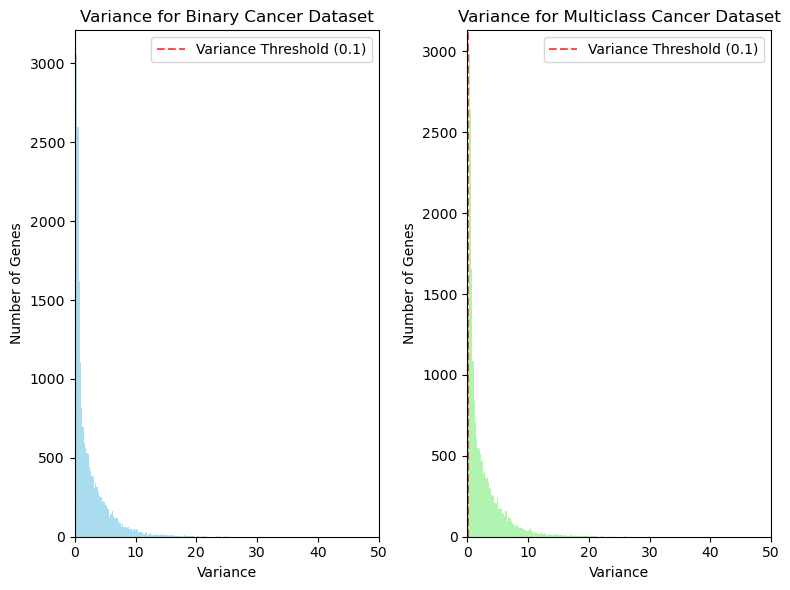

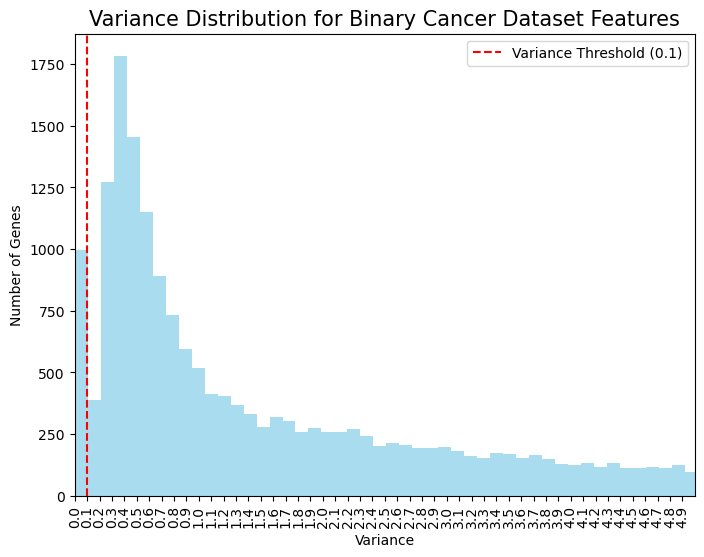

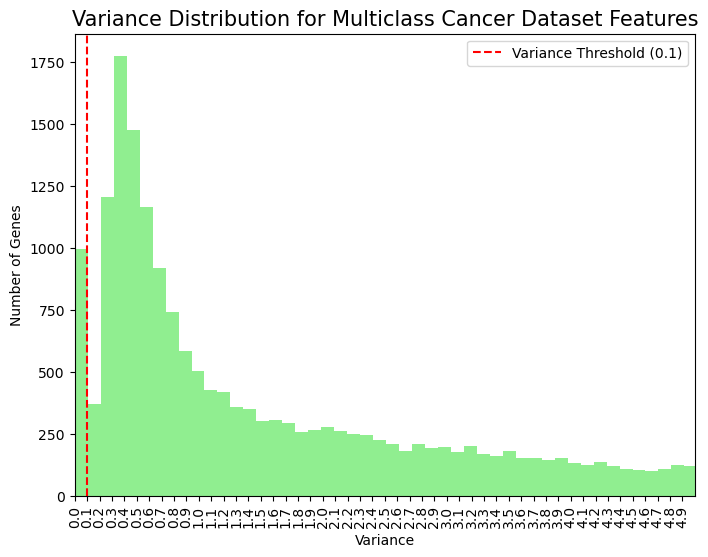

In [60]:
import matplotlib.pyplot as plt
import numpy as np 
#inspecting variance distribution 
variance_binary = X_binary.var(axis=0)
variance_multiclass = X_multiclass.var(axis=0)

#plotting the distribution without zooming in
fig, axes = plt.subplots(1, 2, figsize=(8,6))
axes = axes.flatten()

# Plotting the variance distribution for binary cancer dataset
axes[0].hist(variance_binary, bins=1000, color='skyblue', alpha=0.7)
axes[0].set_title('Variance for Binary Cancer Dataset')
axes[0].set_xlabel('Variance')
axes[0].set_xlim(0, 50)
axes[0].set_ylabel('Number of Genes')
axes[0].axvline(x=0.1, color='r', linestyle='--', alpha=0.7, label='Variance Threshold (0.1)')
axes[0].legend()
# Plotting the variance distribution for multiclass cancer dataset
axes[1].hist(variance_multiclass, bins=1000, color='lightgreen', alpha=0.7)
axes[1].set_title('Variance for Multiclass Cancer Dataset')
axes[1].set_xlabel('Variance')
axes[1].set_xlim(0, 50)
axes[1].set_ylabel('Number of Genes')
axes[1].axvline(x=0.1, color='r', linestyle='--', alpha=0.7, label='Variance Threshold (0.1)')
axes[1].legend()
plt.tight_layout()
#plt.savefig('variance_distribution_cancer_datasets.png')
plt.show()

#Plotting the distribution 
plt.figure(figsize=(8,6))
plt.hist(variance_binary, bins=2000, color='skyblue', alpha=0.7)
plt.title('Variance Distribution for Binary Cancer Dataset Features', fontsize=15)
plt.xlabel('Variance')
plt.ylabel('Number of Genes')
#x axis limit to focus on the variance threshold of 50
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, 0.1))
plt.xticks(rotation=90)
plt.axvline(x=0.1, color='r', linestyle='--', label='Variance Threshold (0.1)')
plt.legend()
#plt.savefig('variance_distribution_binary_cancer.png')
plt.show()

#Plotting the distribution for multiclass cancer dataset
plt.figure(figsize=(8,6))
plt.hist(variance_multiclass, bins=2000, color='lightgreen')
plt.title('Variance Distribution for Multiclass Cancer Dataset Features', fontsize=15)
plt.xlabel('Variance')
plt.ylabel('Number of Genes')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, 0.1))
plt.xticks(rotation=90)

plt.axvline(x=0.1, color='r', linestyle='--', label='Variance Threshold (0.1)')
plt.legend()
#plt.savefig('variance_distribution_multiclass_cancer.png')
plt.show()



#### Variance Selection itself
WATCH OUT, THE NEXT CELL TAKES HOURS TO RUN


In [ ]:
#Selecting the best threshold for variance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

threshold_list = np.arange(0.01, 0.5, 0.02)  
variance_threshold_model = RandomForestClassifier(n_estimators=100, random_state=42)
score_binary = []
score_multiclass = []

for threshold in threshold_list: 
    selector = VarianceThreshold(threshold=threshold)
    X_binary_filtered = selector.fit_transform(X_binary)
    X_multiclass_filtered = selector.fit_transform(X_multiclass)
    score_binary_mean = cross_val_score(variance_threshold_model, X_binary_filtered, y_binary, cv=3, n_jobs = 1).mean()
    score_multiclass_mean = cross_val_score(variance_threshold_model, X_multiclass_filtered, y_multiclass, cv=3, n_jobs = 1).mean()
    score_binary.append(score_binary_mean)
    score_multiclass.append(score_multiclass_mean)


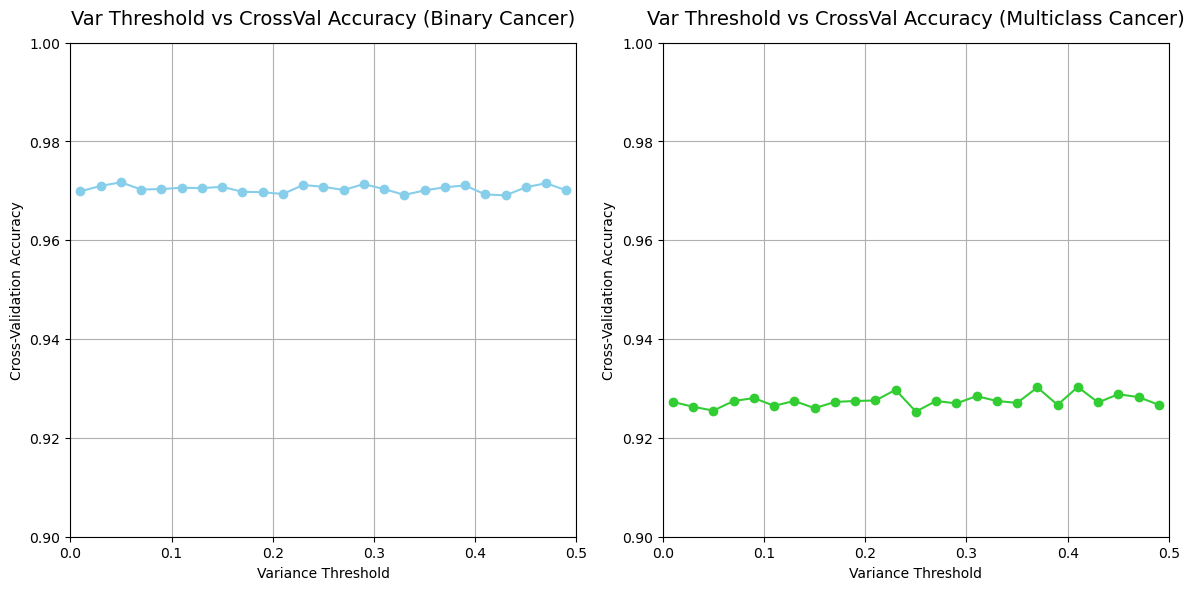

Best Variance Threshold for Binary Cancer Dataset: 0.049999999999999996
Best Variance Threshold for Multiclass Cancer Dataset: 0.4099999999999999


In [ ]:
#Plotting the variance result and deciding which one to use for the following model

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#binary cancer dataset
axes[0].plot(threshold_list, score_binary, marker='o', linestyle='-', color='skyblue')
axes[0].set_title('Var Threshold vs CrossVal Accuracy (Binary Cancer)', fontsize=14, y = 1.02)
axes[0].set_xlabel('Variance Threshold')
axes[0].set_ylabel('Cross-Validation Accuracy')
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0.9, 1)
axes[0].grid()

axes[1].plot(threshold_list, score_multiclass, marker='o', linestyle='-', color='limegreen')
axes[1].set_title('Var Threshold vs CrossVal Accuracy (Multiclass Cancer)', fontsize=14, y = 1.02)
axes[1].set_xlabel('Variance Threshold')
axes[1].set_ylabel('Cross-Validation Accuracy')
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0.9, 1)
axes[1].grid()
plt.tight_layout()
#plt.savefig('variance_threshold_vs_accuracy.png')
plt.show()

#Choose the variance threshold that gives the best accuracy for both binary and multiclass datasets
best_threshold_binary = threshold_list[np.argmax(score_binary)]
best_threshold_multiclass = threshold_list[np.argmax(score_multiclass)]
print(f'Best Variance Threshold for Binary Cancer Dataset: {best_threshold_binary}')
print(f'Best Variance Threshold for Multiclass Cancer Dataset: {best_threshold_multiclass}')


In [74]:
best_scores_arr_multiclass = np.array(score_multiclass)
top_5_scores = 5
top_5_indexes = best_scores_arr_multiclass.argsort()[-top_5_scores:]
best_threshold_multiclass_adjusted = min([threshold_list[i] for i in top_5_indexes])
print(f'Adjusted Best Variance Threshold for Multiclass Cancer Dataset (Top {top_5_scores} Scores): {best_threshold_multiclass_adjusted}')


Adjusted Best Variance Threshold for Multiclass Cancer Dataset (Top 5 Scores): 0.22999999999999995


In [72]:
#Save the variance threshold scores to a CSV file
variance_threshold_scores = pd.DataFrame({
    'Threshold': threshold_list,
    'Binary_Score': score_binary,
    'Multiclass_Score': score_multiclass
})
variance_threshold_scores.to_csv('variance_threshold_scores.csv', index=False)
print("Variance threshold scores have been saved to 'variance_threshold_scores.csv' successfully.")

Variance threshold scores have been saved to 'variance_threshold_scores.csv' successfully.


In [12]:
#read the csv for variance threshold scores and choose the best threshold
variance_threshold_scores = pd.read_csv('variance_threshold_scores.csv')

thresholds = variance_threshold_scores['Threshold'].values
binary_scores = variance_threshold_scores['Binary_Score'].values
multiclass_scores = variance_threshold_scores['Multiclass_Score'].values

best_threshold_binary = thresholds[np.argmax(binary_scores)]
top_5_scores = 5
top_5_indices = np.argsort(multiclass_scores)[-top_5_scores:]
best_threshold_multiclass_adjusted = np.min(thresholds[top_5_indices])

print(f'Best Variance Threshold for Binary Cancer Dataset: {best_threshold_binary}')
print(f'Adjusted Best Variance Threshold for Multiclass Cancer Dataset (Top {top_5_scores} Scores): {best_threshold_multiclass_adjusted}')


Best Variance Threshold for Binary Cancer Dataset: 0.0499999999999999
Adjusted Best Variance Threshold for Multiclass Cancer Dataset (Top 5 Scores): 0.2299999999999999


In [13]:
#Apply the variance threshold to filter the features in both datasets
selector_binary = VarianceThreshold(threshold=best_threshold_binary)

X_binary_var_filtered = selector_binary.fit_transform(X_binary)

selector_multiclass = VarianceThreshold(threshold=best_threshold_multiclass_adjusted)
X_multiclass_var_filtered = selector_multiclass.fit_transform(X_multiclass)

#Check the shape after filtering
print(f'X_binary_var_filtered shape: {X_binary_var_filtered.shape}')
print(f'X_multiclass_var_filtered shape: {X_multiclass_var_filtered.shape}')

#Check the number of features removed
num_features_removed_binary = X_binary.shape[1] - X_binary_var_filtered.shape[1]
num_features_removed_multiclass = X_multiclass.shape[1] - X_multiclass_var_filtered.shape[1]
print(f'Number of features removed in Binary Cancer Dataset: {num_features_removed_binary}')
print(f'Number of features removed in Multiclass Cancer Dataset: {num_features_removed_multiclass}')

X_binary_var_filtered shape: (10963, 19749)
X_multiclass_var_filtered shape: (10244, 19025)
Number of features removed in Binary Cancer Dataset: 785
Number of features removed in Multiclass Cancer Dataset: 1508


In [64]:
#saving the variance selector 
import joblib
joblib.dump(selector_binary, 'variance_selector_binary.joblib')
joblib.dump(selector_multiclass, 'variance_selector_multiclass.joblib')
print("Variance selectors for both binary and multiclass cancer datasets have been saved successfully.")

Variance selectors for both binary and multiclass cancer datasets have been saved successfully.


#### Result: Final chosen variance = 0.049 for Binary and variance = 0.229 for Multiclass

--------------------

## Part 2B - ML Pipeline - Finding the Best Off-Shelf Model for Binary Prediction

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

#import standard scaler for Logistic Regression
from sklearn.preprocessing import StandardScaler
#Step: Standardizing the data for Logistic Regression
scaler = StandardScaler()

#redefine x and y
X_binary = X_binary_var_filtered
X_multiclass = X_multiclass_var_filtered
y_binary = y_binary
y_multiclass = y_multiclass
X_binary_scaled = scaler.fit_transform(X_binary)

#Step: initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

#Step: assign kfold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#Step: evaluate the binary model 
print(f'----------------FINDING BEST OFF-SHELF MODEL USING CROSS-VALIDATION ------------------')
binary_results = {}

for model_name, model in models.items():
    print(f'Evaluating {model_name} for Binary Cancer Dataset:')
    if model_name == 'Logistic Regression':
        # For Logistic Regression, use the scaled data
        scores = cross_val_score(model, X_binary_scaled, y_binary, cv=kfold, scoring='accuracy', n_jobs=-1)
    else:
        # For other models, use the original data   
        scores = cross_val_score(model, X_binary, y_binary, cv=kfold, scoring='accuracy', n_jobs=-1)
    binary_results[model_name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"Model name: {model_name}")
    print(f"Mean Accuracy: {binary_results[model_name]['mean_accuracy']:.4f}")
    print(f"Std Accuracy: {binary_results[model_name]['std_accuracy']:.4f}")
    print("Scores for each fold:", binary_results[model_name]['scores'])
    print("--------------------------------------------------\n")
    


----------------FINDING BEST OFF-SHELF MODEL USING CROSS-VALIDATION ------------------
Evaluating Logistic Regression for Binary Cancer Dataset:
Model name: Logistic Regression
Mean Accuracy: 0.9925
Std Accuracy: 0.0011
Scores for each fold: [0.99361605 0.99179207 0.99270406 0.99087591 0.99361314]
--------------------------------------------------

Evaluating Random Forest for Binary Cancer Dataset:
Model name: Random Forest
Mean Accuracy: 0.9869
Std Accuracy: 0.0015
Scores for each fold: [0.98814409 0.9876881  0.9872321  0.98403285 0.98722628]
--------------------------------------------------

Evaluating Naive Bayes for Binary Cancer Dataset:
Model name: Naive Bayes
Mean Accuracy: 0.8763
Std Accuracy: 0.0075
Scores for each fold: [0.88052896 0.88873689 0.87323301 0.87180657 0.86724453]
--------------------------------------------------



In [36]:
xgmodel = {'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=1)}
for model_name, model in xgmodel.items():
    print(f'Evaluating {model_name} for Binary Cancer Dataset:')
    scores = cross_val_score(model, X_binary, y_binary, cv=kfold, scoring='accuracy', n_jobs=-1)
    binary_results[model_name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"Model name: {model_name}")
    print(f"Mean Accuracy: {binary_results[model_name]['mean_accuracy']:.4f}")
    print(f"Std Accuracy: {binary_results[model_name]['std_accuracy']:.4f}")
    print("Scores for each fold:", binary_results[model_name]['scores'])
    print("--------------------------------------------------\n")
    

Evaluating XGBoost for Binary Cancer Dataset:
Model name: XGBoost
Mean Accuracy: 0.9917
Std Accuracy: 0.0020
Scores for each fold: [0.99407205 0.99179207 0.99361605 0.98859489 0.99041971]
--------------------------------------------------



In [37]:
#Step: find the best model for binary cancer dataset
best_binary_model_name = None
best_binary_score = -99
for model_name in binary_results:
    mean_accuracy = binary_results[model_name]['mean_accuracy']
    if mean_accuracy > best_binary_score:
        best_binary_score = mean_accuracy
        best_binary_model_name = model_name

print(f'Best Model for Binary Cancer Dataset: {best_binary_model_name} with Mean Accuracy: {best_binary_score:.4f}')



Best Model for Binary Cancer Dataset: Logistic Regression with Mean Accuracy: 0.9925


In [38]:
#Save all cross-validation for the binary dataset into a CSV file including the logistic regression, random forest, naive bayes and xgboost

import pandas as pd

cv_results_binary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Mean Accuracy': results['mean_accuracy'],
        'Std Accuracy': results['std_accuracy'],
        'Fold Scores': results['scores']
    }
    for model_name, results in binary_results.items()
])

cv_results_binary_df.to_csv('binary_model_cv_results.csv', index=False)
print("Cross-validation results for binary cancer dataset have been saved to 'binary_model_cv_results.csv' successfully.")


Cross-validation results for binary cancer dataset have been saved to 'binary_model_cv_results.csv' successfully.


--------------------

## Part 2C - ML Pipeline - Finding the Best Off-Shelf Model for Multiclass Prediction


In [40]:
#import standard scaler for Logistic Regression
from sklearn.preprocessing import StandardScaler
#Step: Standardizing the data for Logistic Regression
scaler = StandardScaler()
X_multiclass_scaled = scaler.fit_transform(X_multiclass_var_filtered)
#Step: evaluate the multiclass models using cross-val to decide which of them to then improve using gridsearch
print(f'----------------FINDING BEST OFF-SHELF MODEL USING CROSS-VALIDATION FOR MULTICLASS ------------------')
multiclass_results = {}
#Step: initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

#Step: evaluate the multiclass models
for model_name, model in models.items():
    print(f'Evaluating {model_name} for Multiclass Cancer Dataset:')
    if model_name == 'Logistic Regression':
        scores = cross_val_score(model, X_multiclass_scaled, y_multiclass, cv=kfold, scoring='accuracy', n_jobs=-1)
    else:
        scores = cross_val_score(model, X_multiclass, y_multiclass, cv=kfold, scoring='accuracy', n_jobs=-1)
    multiclass_results[model_name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"Model name: {model_name}")
    print(f"Mean Accuracy: {multiclass_results[model_name]['mean_accuracy']:.4f}")
    print(f"Std Accuracy: {multiclass_results[model_name]['std_accuracy']:.4f}")
    print("Scores for each fold:", multiclass_results[model_name]['scores'])
    print("--------------------------------------------------\n")



----------------FINDING BEST OFF-SHELF MODEL USING CROSS-VALIDATION FOR MULTICLASS ------------------
Evaluating Logistic Regression for Multiclass Cancer Dataset:
Model name: Logistic Regression
Mean Accuracy: 0.9655
Std Accuracy: 0.0042
Scores for each fold: [0.96144461 0.96876525 0.96974134 0.96827721 0.95947266]
--------------------------------------------------

Evaluating Random Forest for Multiclass Cancer Dataset:
Model name: Random Forest
Mean Accuracy: 0.9482
Std Accuracy: 0.0024
Scores for each fold: [0.9443631  0.94973158 0.95070766 0.94973158 0.94628906]
--------------------------------------------------

Evaluating Naive Bayes for Multiclass Cancer Dataset:
Model name: Naive Bayes
Mean Accuracy: 0.8623
Std Accuracy: 0.0060
Scores for each fold: [0.87310883 0.86237189 0.86090776 0.85505124 0.85986328]
--------------------------------------------------



In [42]:
xgmodel = {'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=1)}
for model_name, model in xgmodel.items():
    print(f'Evaluating {model_name} for Multiclass Cancer Dataset:')
    scores = cross_val_score(model, X_multiclass, y_multiclass, cv=kfold, scoring='accuracy', n_jobs=-1)
    multiclass_results[model_name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'scores': scores
    }
    print(f"Model name: {model_name}")
    print(f"Mean Accuracy: {multiclass_results[model_name]['mean_accuracy']:.4f}")
    print(f"Std Accuracy: {multiclass_results[model_name]['std_accuracy']:.4f}")
    print("Scores for each fold:", multiclass_results[model_name]['scores'])
    print("--------------------------------------------------\n")
    

Evaluating XGBoost for Multiclass Cancer Dataset:
Model name: XGBoost
Mean Accuracy: 0.9610
Std Accuracy: 0.0042
Scores for each fold: [0.95754026 0.96486091 0.96242069 0.96534895 0.95458984]
--------------------------------------------------



In [43]:
#Step: find the best model for multiclass cancer dataset
best_multiclass_model_name = None
best_multiclass_score = -99

for model_name in multiclass_results:
    mean_accuracy = multiclass_results[model_name]['mean_accuracy']
    if mean_accuracy > best_multiclass_score:
        best_multiclass_score = mean_accuracy
        best_multiclass_model_name = model_name
        
print(f'Best Model for Multiclass Cancer Dataset: {best_multiclass_model_name} with Mean Accuracy: {best_multiclass_score:.4f}')



Best Model for Multiclass Cancer Dataset: Logistic Regression with Mean Accuracy: 0.9655


In [44]:
#Save all cross-validation for the multiclass dataset into a CSV file including the logistic regression, random forest, naive bayes and xgboost

import pandas as pd

cv_results_multiclass_df = pd.DataFrame([
    {
        'Model': model_name,
        'Mean Accuracy': results['mean_accuracy'],
        'Std Accuracy': results['std_accuracy'],
        'Fold Scores': results['scores']
    }
    for model_name, results in multiclass_results.items()
])

cv_results_multiclass_df.to_csv('multiclass_model_cv_results.csv', index=False)
print("Cross-validation results for multiclass cancer dataset have been saved to 'multiclass_model_cv_results.csv' successfully.")


Cross-validation results for multiclass cancer dataset have been saved to 'multiclass_model_cv_results.csv' successfully.


--------------------
## Part 2D - ML Pipeline - Metric Results for Binary and Multiclass Prediction Off the Shelf Models


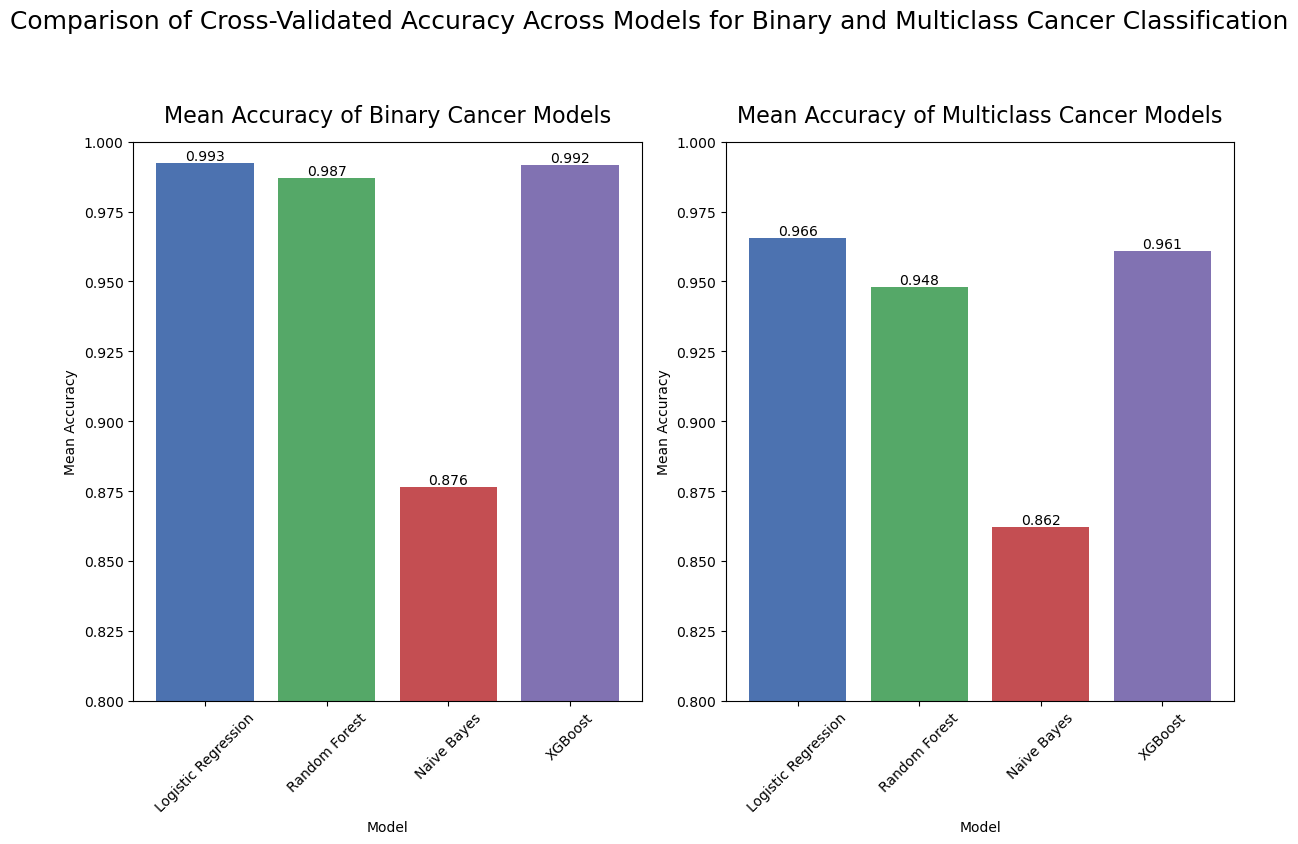

In [45]:
#Visualize the mean scores for both binary and multiclass models
import matplotlib.pyplot as plt
colors_for_bar = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

fig, axes = plt.subplots(1, 2, figsize=(12,8))
# Binary Cancer Dataset
binary_model_names = list(binary_results.keys())
binary_mean_scores = [binary_results[model_name]['mean_accuracy'] for model_name in binary_model_names]
axes[0].bar(binary_model_names, binary_mean_scores, color=colors_for_bar)
axes[0].set_title('Mean Accuracy of Binary Cancer Models', fontsize=16, y = 1.02)
#add bar labels
for i, v in enumerate(binary_mean_scores):
    axes[0].text(i, v, f"{v:.3f}", ha='center', va='bottom', fontsize=10, color='black')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_ylim(0.8, 1)
axes[0].tick_params(axis='x', rotation=45)
# Multiclass Cancer Dataset
multiclass_model_names = list(multiclass_results.keys())
multiclass_mean_scores = [multiclass_results[model_name]['mean_accuracy'] for model_name in multiclass_model_names]
axes[1].bar(multiclass_model_names, multiclass_mean_scores, color=colors_for_bar)
axes[1].set_title('Mean Accuracy of Multiclass Cancer Models', fontsize=16, y = 1.02)
for i, v in enumerate(multiclass_mean_scores):
    axes[1].text(i, v, f"{v:.3f}", ha='center', va='bottom', fontsize=10, color='black')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Mean Accuracy')
axes[1].set_ylim(0.8, 1)
axes[1].tick_params(axis='x', rotation=45)
#title overall 
plt.suptitle('Comparison of Cross-Validated Accuracy Across Models for Binary and Multiclass Cancer Classification', fontsize=18, y = 1.05)
plt.tight_layout()
plt.savefig('model_comparison_binary_multiclass.png')
plt.show()


--------------------
## Part 2E - ML Pipeline - Train Test Split and Data Scaling


In [15]:
print(f'----------------TRAIN TEST SPLIT FOR BINARY MODEL------------------')
#Step: Test Train Split for the best binary model
from sklearn.model_selection import train_test_split

#Splitting the binary dataset into train and test sets
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(
    X_binary_var_filtered, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f'X_binary_train shape: {X_binary_train.shape}')
print(f'X_binary_test shape: {X_binary_test.shape}')
print(f'y_binary_train shape: {y_binary_train.shape}')
print(f'y_binary_test shape: {y_binary_test.shape}')



----------------TRAIN TEST SPLIT FOR BINARY MODEL------------------
X_binary_train shape: (8770, 19749)
X_binary_test shape: (2193, 19749)
y_binary_train shape: (8770,)
y_binary_test shape: (2193,)


### 

In [16]:
print(f'----------------TRAIN TEST SPLIT FOR MULTICLASS MODEL------------------')
#Step: Test Train Split for the best multiclass model

X_multiclass_train, X_multiclass_test, y_multiclass_train, y_multiclass_test = train_test_split(
    X_multiclass_var_filtered, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
    )

print(f'X_multiclass_train shape: {X_multiclass_train.shape}')
print(f'X_multiclass_test shape: {X_multiclass_test.shape}')
print(f'y_multiclass_train shape: {y_multiclass_train.shape}')
print(f'y_multiclass_test shape: {y_multiclass_test.shape}')


----------------TRAIN TEST SPLIT FOR MULTICLASS MODEL------------------
X_multiclass_train shape: (8195, 19025)
X_multiclass_test shape: (2049, 19025)
y_multiclass_train shape: (8195,)
y_multiclass_test shape: (2049,)


In [17]:
#Step: Scale the data for Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_binary_train_scaled = scaler.fit_transform(X_binary_train)
X_binary_test_scaled = scaler.transform(X_binary_test)
scaler_multiclass = StandardScaler()
X_multiclass_train_scaled = scaler_multiclass.fit_transform(X_multiclass_train)
X_multiclass_test_scaled = scaler_multiclass.transform(X_multiclass_test)

print(f'Data scaling complete for both binary and multiclass datasets.')


Data scaling complete for both binary and multiclass datasets.


In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

#Step: Hyperparameter tuning for the best model using GridSearchCV

#defining the parameter grids

param_grid_logistic_regression = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], 
    'solver': ['liblinear'],
    'fit_intercept': [True, False],  # whether to include the intercept term
}

param_grid_xgboost = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

#kfold definition
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f'cell finished')

cell finished


--------------------
--------------------


## **Part 3: ML Pipeline for Binary Classifier Training and Evaluation**
#### Part 3A - Binary Classifier - Hyperparameter Tuning
#### Part 3B - Binary Classifier - Metric Results for Hyperparameter Tuning
#### Part 3C - Binary Classifier - Stacking Classifier Training and Metrics
#### Part 3D - Binary Classifier - Stacking Classifier Evaluation

--------------------
## Part 3A - Binary Classifier - Hyperparameter Tuning


In [19]:
print(f'----------------HYPERPARAMETER TUNING FOR BINARY MODEL------------------')
#Step: Grid search for the Logistic Regression Binary Model
grid_logistic_binary = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_logistic_regression,
    scoring='accuracy',
    cv =kfold,
    n_jobs=1,
    verbose=1
)

#Step: Fitting the model 
grid_logistic_binary.fit(X_binary_train_scaled, y_binary_train)
print(f'Best parameters for Logistic Regression Binary Model: {grid_logistic_binary.best_params_}')
print(f'Best cross-validation score for Logistic Regression Binary Model: {grid_logistic_binary.best_score_:.4f}')

----------------HYPERPARAMETER TUNING FOR BINARY MODEL------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression Binary Model: {'C': 100, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression Binary Model: 0.9737


In [ ]:
#Step: Grid search for the XgBoost Binary Model
grid_xgboost_binary = GridSearchCV(
        estimator=XGBClassifier(eval_metric='mlogloss', random_state=42),
        param_grid=param_grid_xgboost,
        scoring='accuracy',
        cv=kfold,
        n_jobs=1,
        verbose=1
    )

#Step: Fitting the model 
grid_xgboost_binary.fit(X_binary_train, y_binary_train)
print(f'Best parameters for XGBoost Binary Model: {grid_xgboost_binary.best_params_}')
print(f'Best cross-validation score for XGBoost Binary Model: {grid_xgboost_binary.best_score_:.4f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/alejandroscaffa/miniconda3/envs/dsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alejandroscaffa/miniconda3/envs/dsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alejandroscaffa/miniconda3/envs/dsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alejandroscaffa/miniconda3/envs/dsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parame

Best parameters for XGBoost Binary Model: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score for XGBoost Binary Model: 0.9924


Note: The code above works, the warnings are just warnings that are not relevant to the code running

### Result: Best params for Logistic Regression Binary Model
```
The best parameters found for Logistic Regression:
Best parameters for Logistic Regression Binary Model: {'C': 100, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
The best parameters found for XGBoost:
Best parameters for XGBoost Binary Model: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
```

--------------------
## Part 3B - Binary Classifier - Metric Results for Hyperparameter Tuning

XGBoost is the best model for Binary Cancer Prediction.


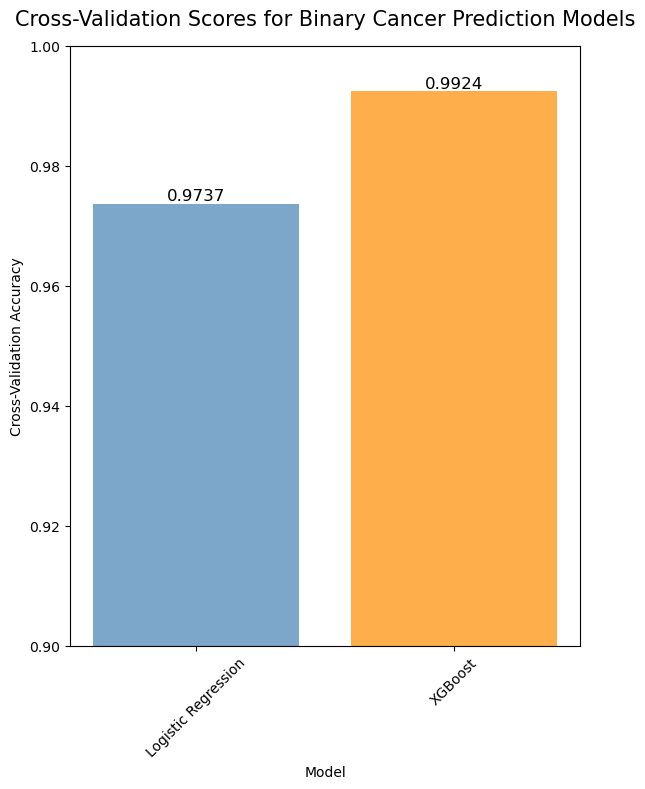

In [44]:
#Step: Evaluate which of the two models is better
best_logistic_binary = grid_logistic_binary.best_estimator_
best_xgboost_binary = grid_xgboost_binary.best_estimator_
best_model_binary = None

#print which one is best
if grid_logistic_binary.best_score_ > grid_xgboost_binary.best_score_:
    best_model_binary = best_logistic_binary
    print("Logistic Regression is the best model for Binary Cancer Prediction.")
else:
    best_model_binary = best_xgboost_binary
    print("XGBoost is the best model for Binary Cancer Prediction.")

#Image comparative results
import matplotlib.pyplot as plt
# Plotting the cross-validation scores for both models
plt.figure(figsize=(6, 8))
plt.bar(['Logistic Regression', 'XGBoost'], 
        [grid_logistic_binary.best_score_, grid_xgboost_binary.best_score_], alpha=0.7, color=['steelblue', 'darkorange'])
plt.title('Cross-Validation Scores for Binary Cancer Prediction Models', fontsize=15, y=1.02)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
#Adding best scores on top of the bars
for i, score in enumerate([grid_logistic_binary.best_score_, grid_xgboost_binary.best_score_]):
    plt.text(i, score, f"{score:.4f}", ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0.9, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('binary_cancer_model_comparison_gridsearch.png')
plt.show()


In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
#Inspecting the ROC AUC for both models

#Logistic Regression predictions
logistic_binary_pred = grid_logistic_binary.best_estimator_.predict( X_binary_test_scaled)
logistic_binary_proba = grid_logistic_binary.best_estimator_.predict_proba(X_binary_test_scaled)[:, 1]

#XGBoost predictions
xgb_binary_pred = grid_xgboost_binary.best_estimator_.predict(X_binary_test)
xgb_binary_proba = grid_xgboost_binary.best_estimator_.predict_proba(X_binary_test)[:, 1]

#Calculate ROC AUC for both models
logistic_accuracy = accuracy_score(y_binary_test, logistic_binary_pred)
logistic_auc = roc_auc_score(y_binary_test, logistic_binary_proba)
xgb_accuracy = accuracy_score(y_binary_test, xgb_binary_pred)
xgb_auc = roc_auc_score(y_binary_test, xgb_binary_proba)

#print the results
print(f'Logistic Regression Binary Model - Accuracy: {logistic_accuracy:.4f}, ROC AUC: {logistic_auc:.4f}')
print(f'XGBoost Binary Model - Accuracy: {xgb_accuracy:.4f}, ROC AUC: {xgb_auc:.4f}')




Logistic Regression Binary Model - Accuracy: 0.9936, ROC AUC: 0.9886
XGBoost Binary Model - Accuracy: 0.9936, ROC AUC: 0.9927


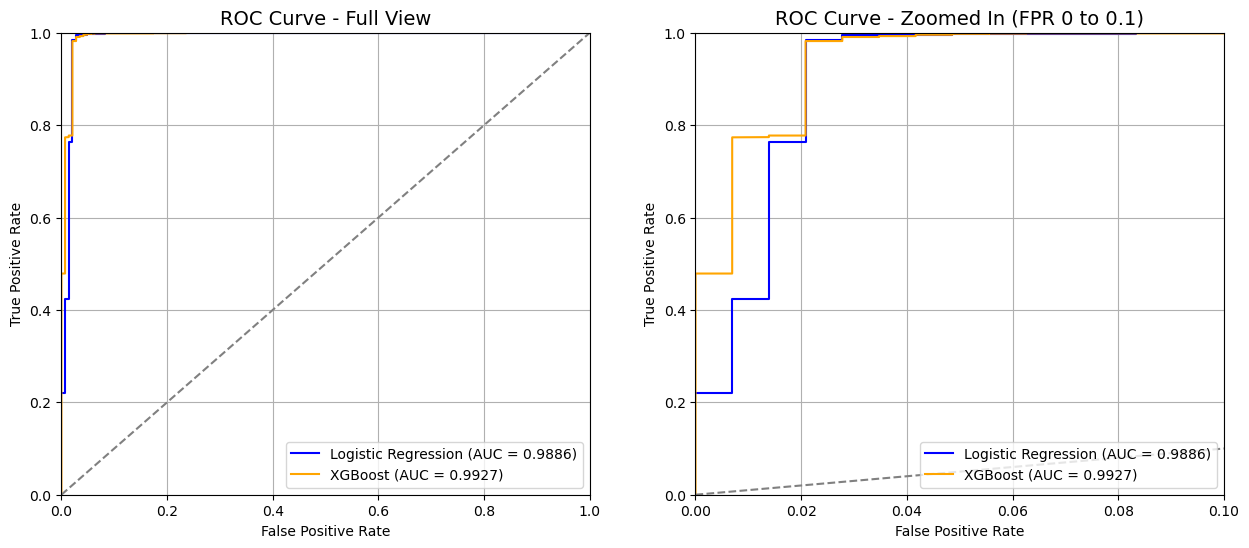

In [ ]:
#plotting the ROC curves for both models
false_pos_logistic, true_pos_logistic, _ = roc_curve(y_binary_test, logistic_binary_proba)
false_pos_xgb, true_pos_xgb, _ = roc_curve(y_binary_test, xgb_binary_proba)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#ROC Curve 
axes[0].plot(false_pos_logistic, true_pos_logistic, color='blue', label=f'Logistic Regression (AUC = {logistic_auc:.4f})')
axes[0].plot(false_pos_xgb, true_pos_xgb, color='orange', label=f'XGBoost (AUC = {xgb_auc:.4f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curve - Full View', fontsize=14)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])
axes[0].legend(loc='lower right')
axes[0].grid()

#zooming into the curve for better visualization
axes[1].plot(false_pos_logistic, true_pos_logistic, color='blue', label=f'Logistic Regression (AUC = {logistic_auc:.4f})')
axes[1].plot(false_pos_xgb, true_pos_xgb, color='orange', label=f'XGBoost (AUC = {xgb_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_title('ROC Curve - Zoomed In', fontsize=14)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlim([0, 0.1])
axes[1].set_ylim([0, 1])
axes[1].legend(loc='lower right')
axes[1].grid()


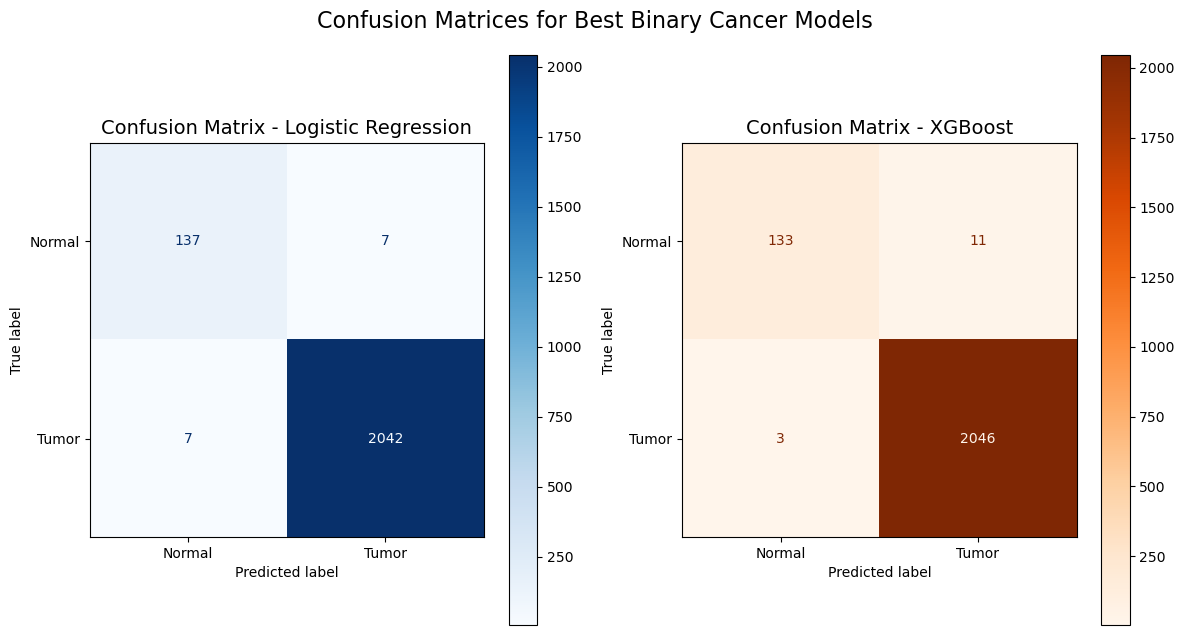

In [40]:
#Doing the confusion matrix for the best binary models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_binary_test, logistic_binary_pred)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Normal', 'Tumor'])
disp_logistic.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix - Logistic Regression', fontsize=14)

#Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_binary_test, xgb_binary_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Normal', 'Tumor'])
disp_xgb.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title('Confusion Matrix - XGBoost', fontsize=14)
plt.tight_layout()
plt.suptitle('Confusion Matrices for Best Binary Cancer Models', fontsize=16, y=1.05)
plt.savefig('binary_cancer_confusion_matrices_best_2_models.png')
plt.show()



In [54]:
#Save best estimators for logistic regression and xgboost binary models
import joblib
joblib.dump(grid_logistic_binary.best_estimator_, 'best_logistic_regression_binary_model_grid.pkl')
joblib.dump(grid_xgboost_binary.best_estimator_, 'best_xgboost_binary_model_grid.pkl')

print("Best binary models have been saved successfully as 'best_logistic_regression_binary_model_grid.pkl' and 'best_xgboost_binary_model_grid.pkl'.")

Best binary models have been saved successfully as 'best_logistic_regression_binary_model_grid.pkl' and 'best_xgboost_binary_model_grid.pkl'.


--------------------
## Part 3C - Binary Classifier - Stacking Classifier Training and Metrics
#### Training the Best Models With Best Params for Binary Classification of Cancer and Comparing Performance Vs a Stacking Model 

In [3]:
import multiprocessing
print(f"Available logical cores: {multiprocessing.cpu_count()}")
print(f"These are the available ones for n_jobs within the gridsearch.")


Available logical cores: 11
These are the available ones for n_jobs within the gridsearch.


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print('----------------TRAINING STACKING CLASSIFIER FOR BINARY MODEL------------------')

#Step: Define stacking model using best estimators directly from GridSearchCV
best_logistic_binary = joblib.load('best_logistic_regression_binary_model_grid.pkl')
best_xgboost_binary = joblib.load('best_xgboost_binary_model_grid.pkl')

stacking_binary_model = StackingClassifier(
    estimators=[
        ('logistic', best_logistic_binary),
        ('xgboost', best_xgboost_binary)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=kfold,
    n_jobs=3 #using three cores for parallel processing have until 11, but 11 crashes things
)

#Step: Fit the stacking model to the training data
stacking_binary_model.fit(X_binary_train_scaled, y_binary_train)

#Step: Predict on the test set
stacked_binary_pred = stacking_binary_model.predict(X_binary_test_scaled)
stacked_binary_proba = stacking_binary_model.predict_proba(X_binary_test_scaled)[:, 1]

#Step: Evaluate performance
stacked_accuracy = accuracy_score(y_binary_test, stacked_binary_pred)
stacked_auc = roc_auc_score(y_binary_test, stacked_binary_proba)

print(f'Stacking Model - Accuracy: {stacked_accuracy:.4f}, ROC AUC: {stacked_auc:.4f}')
print("Classification Report for Stacking Model:\n", classification_report(y_binary_test, stacked_binary_pred, target_names=['Normal', 'Tumor']))


----------------TRAINING STACKING CLASSIFIER FOR BINARY MODEL------------------


/Users/alejandroscaffa/miniconda3/envs/dsenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:27:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[11:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[11:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Stacking Model - Accuracy: 0.9932, ROC AUC: 0.9909
Classification Report for Stacking Model:
               precision    recall  f1-score   support

      Normal       0.97      0.92      0.95       144
       Tumor       0.99      1.00      1.00      2049

    accuracy                           0.99      2193
   macro avg       0.98      0.96      0.97      2193
weighted avg       0.99      0.99      0.99      2193



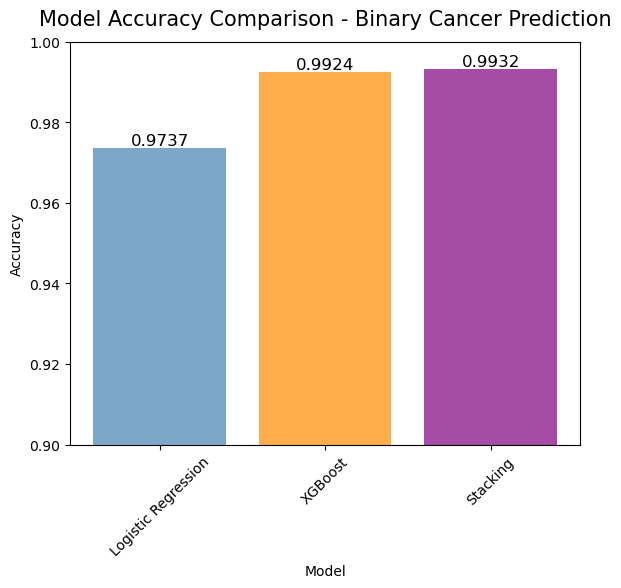

In [56]:
#Plotting the ROC curve for the stacking model including the best binary models separately
plt.figure(figsize=(6, 6))
plt.bar(['Logistic Regression', 'XGBoost', 'Stacking'], 
        [grid_logistic_binary.best_score_, 
         grid_xgboost_binary.best_score_, 
         stacked_accuracy],  #Note: this is test accuracy, not cross-validation score
        alpha=0.7, color=['steelblue', 'darkorange', 'purple'])

plt.title('Model Accuracy Comparison - Binary Cancer Prediction', fontsize=15, y=1.02)
plt.xlabel('Model')
plt.ylabel('Accuracy')
#Adding best scores on top of the bars
for i, score in enumerate( [grid_logistic_binary.best_score_, grid_xgboost_binary.best_score_, stacked_accuracy]):
    plt.text(i, score, f"{score:.4f}", ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0.9, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('binary_cancer_model_comparison_with_stacking.png')
plt.show()


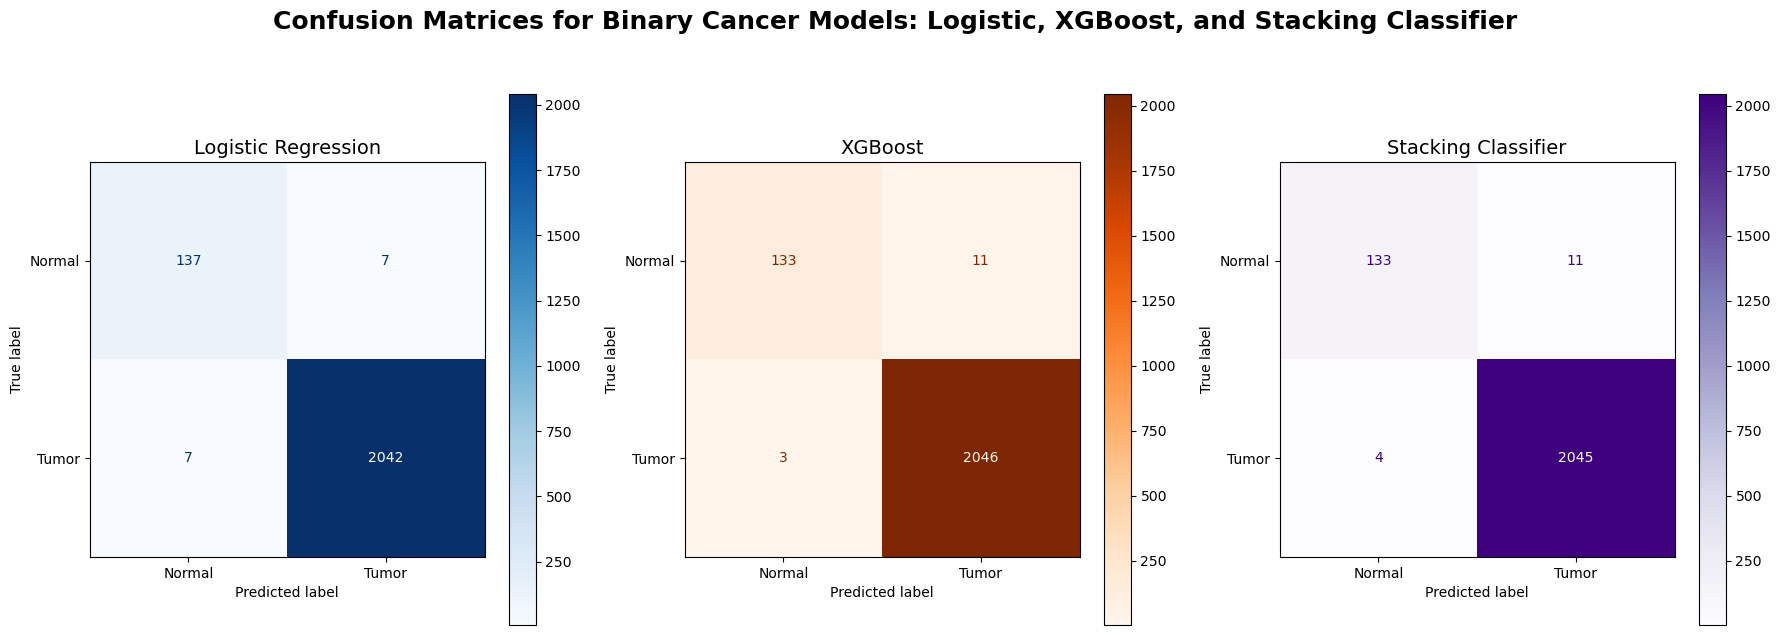

In [57]:
#Step: Confusion matrices for all three models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#CM for Logistic Regression
cm_logistic = confusion_matrix(y_binary_test, logistic_binary_pred)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Normal', 'Tumor'])
disp_logistic.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Logistic Regression', fontsize=14)

#CM for XGBoost
cm_xgb = confusion_matrix(y_binary_test, xgb_binary_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Normal', 'Tumor'])
disp_xgb.plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title('XGBoost', fontsize=14)

#CM for Stacking
cm_stacking = confusion_matrix(y_binary_test, stacked_binary_pred)
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=cm_stacking, display_labels=['Normal', 'Tumor'])
disp_stacking.plot(ax=axes[2], cmap='Purples', values_format='d')
axes[2].set_title('Stacking Classifier', fontsize=14)

plt.suptitle('Confusion Matrices for Binary Cancer Models: Logistic, XGBoost, and Stacking Classifier', fontsize=18, y=1.05, fontweight='bold')

plt.tight_layout()
plt.savefig('binary_cancer_confusion_matrices_all_models.png')
plt.show()


In [58]:
#Classification report for all three models:

from sklearn.metrics import classification_report

print('----------------CLASSIFICATION REPORT: LOGISTIC REGRESSION----------------')
classification_logistic_binary = classification_report(y_binary_test, logistic_binary_pred, target_names=['Normal', 'Tumor'])
print(classification_logistic_binary)

print('----------------CLASSIFICATION REPORT: XGBOOST----------------')
classification_xgb_binary = classification_report(y_binary_test, xgb_binary_pred, target_names=['Normal', 'Tumor'])
print(classification_xgb_binary)

print('----------------CLASSIFICATION REPORT: STACKING CLASSIFIER----------------')
classification_stacking_binary = classification_report(y_binary_test, stacked_binary_pred, target_names=['Normal', 'Tumor'])
print(classification_stacking_binary)



----------------CLASSIFICATION REPORT: LOGISTIC REGRESSION----------------
              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       144
       Tumor       1.00      1.00      1.00      2049

    accuracy                           0.99      2193
   macro avg       0.97      0.97      0.97      2193
weighted avg       0.99      0.99      0.99      2193

----------------CLASSIFICATION REPORT: XGBOOST----------------
              precision    recall  f1-score   support

      Normal       0.98      0.92      0.95       144
       Tumor       0.99      1.00      1.00      2049

    accuracy                           0.99      2193
   macro avg       0.99      0.96      0.97      2193
weighted avg       0.99      0.99      0.99      2193

----------------CLASSIFICATION REPORT: STACKING CLASSIFIER----------------
              precision    recall  f1-score   support

      Normal       0.97      0.92      0.95       144
       Tumor       0.99 

In [ ]:
#Saving the best model
import joblib
from sklearn.metrics import accuracy_score, classification_report

#Best model stacking 
joblib.dump(stacking_binary_model, 'best_stacking_binary_model.pkl')
print("Best stacking binary model has been saved successfully as 'best_stacking_binary_model.pkl'.")


Best stacking binary model has been saved successfully as 'best_stacking_binary_model.pkl'.


### Result: Final Model for Binary Cancer Prediction Stacking Classifier
Saved using joblib to then use the model for the grading_document.ipynb



--------------------
## Part 3D - Binary Classifier - Stacking Classifier Evaluation


In [67]:
#------------------FINAL PREDICTION AND EVALUATION-----------------
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve)
import numpy as np


#Load full dataset
df = pd.read_csv('final_binary_cancer_prediction_dataset.csv')

#extract target, Normal = 0 and Tumor = 1
y_binary = df['sample_type_encoded']

# Drop unused and target columns to form X
X_binary = df.drop(columns=[
    'sample',
    'gender',
    '_primary_disease', #Same as target but not the abbreviation
    'sample_type', #TARGET is the sample_type column
    'cancer type abbreviation',
    'sample_type_encoded',  #TARGET is the sample_type_encoded column
])

#Load best variance threshold from saved scores
variance_threshold_scores = pd.read_csv('variance_threshold_scores.csv')
thresholds = variance_threshold_scores['Threshold'].values
binary_scores = variance_threshold_scores['Binary_Score'].values
best_threshold_binary = thresholds[np.argmax(binary_scores)]
print(f'Best Variance Threshold for Binary Cancer Dataset: {best_threshold_binary}')
selector = joblib.load('variance_selector_binary.joblib')
#Fit Transform the data using the best variance threshold
X_binary_filtered = selector.transform(X_binary)

#Scale features using the same logic as training
scaler = StandardScaler()
X_binary_scaled = scaler.fit_transform(X_binary_filtered)

#Load saved stacking model
stacking_binary_model = joblib.load('best_stacking_binary_model.pkl')

#Predict using the loaded model
y_pred = stacking_binary_model.predict(X_binary_scaled)
y_proba = stacking_binary_model.predict_proba(X_binary_scaled)[:, 1]

#Evaluating final results to the known labels
accuracy = accuracy_score(y_binary, y_pred)
auc = roc_auc_score(y_binary, y_proba)
print(f'\nAccuracy: {accuracy:.4f}')
print(f'ROC AUC: {auc:.4f}\n')



Best Variance Threshold for Binary Cancer Dataset: 0.0499999999999999

Accuracy: 0.9986
ROC AUC: 0.9985



------ CLASSIFICATION REPORT: STACKING MODEL ------
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99       719
       Tumor       1.00      1.00      1.00     10244

    accuracy                           1.00     10963
   macro avg       1.00      0.99      0.99     10963
weighted avg       1.00      1.00      1.00     10963



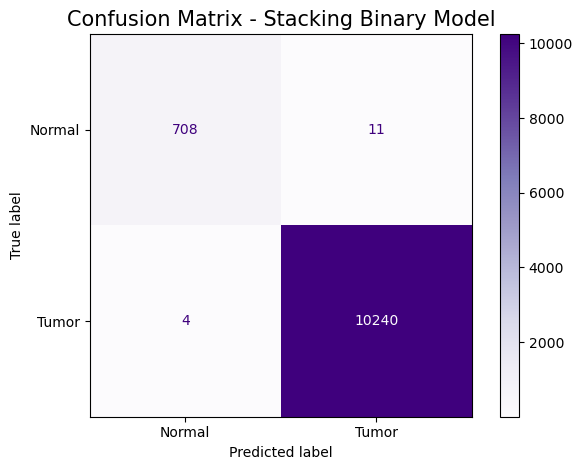

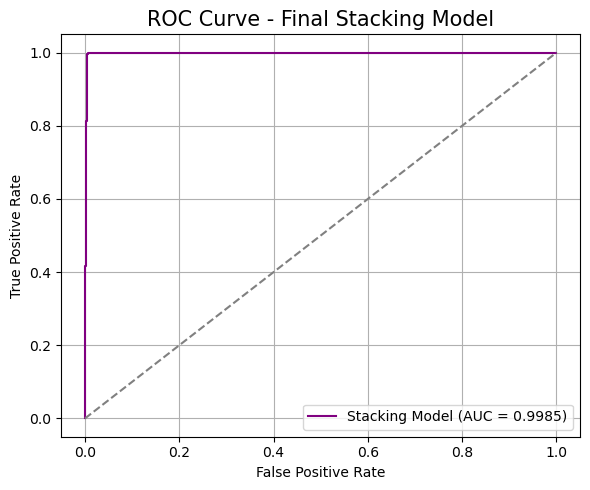

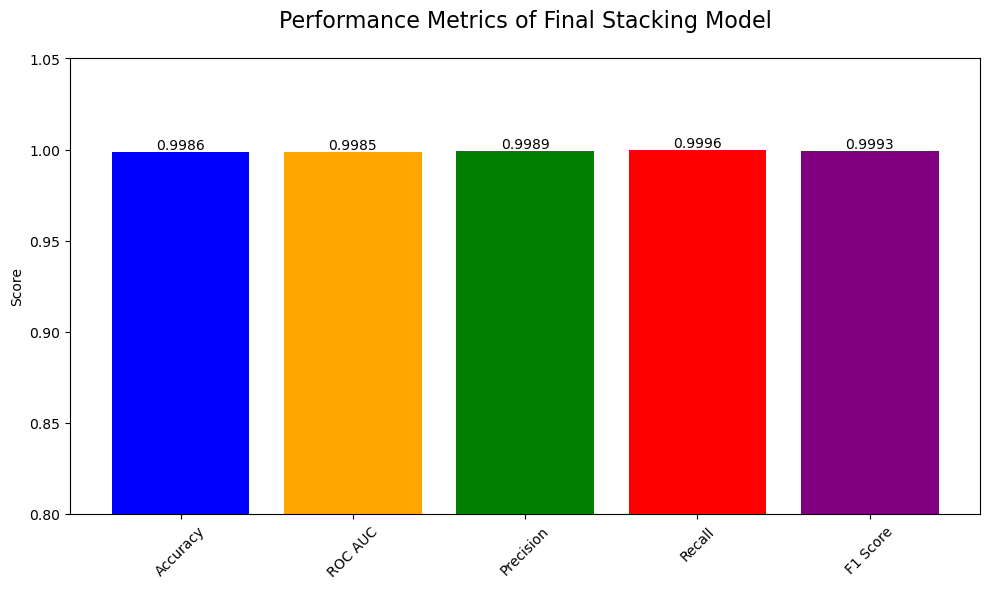

In [77]:
#Printing classification report
print("------ CLASSIFICATION REPORT: STACKING MODEL ------")
print(classification_report(y_binary, y_pred, target_names=['Normal', 'Tumor']))

#Plotting out the confusion matrix for the final stacking model
cm = confusion_matrix(y_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Tumor'])
disp.plot(cmap='Purples', values_format='d')
plt.title('Confusion Matrix - Stacking Binary Model', fontsize=15)
plt.tight_layout()
plt.savefig('confusion_matrix_stacking_final_model.png')
plt.show()

#and now theROC Curve
falseposr, trueposr, _ = roc_curve(y_binary, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(falseposr, trueposr, label=f'Stacking Model (AUC = {auc:.4f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Stacking Model', fontsize=15)
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('roc_curve_stacking_final_model.png')
plt.show()

#plotting the accuracy the ROC AUC, the Precision, the Recall, and the F-1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_binary, y_pred)
recall = recall_score(y_binary, y_pred)
f1 = f1_score(y_binary, y_pred)
# Plotting the metrics
metrics = [accuracy, auc, precision, recall, f1]
metric_names = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Performance Metrics of Final Stacking Model', fontsize=16, y=1.05)
for i, value in enumerate(metrics):
    plt.text(i, value, f"{value:.4f}", ha='center', va='bottom', fontsize=10, color='black')
plt.ylim(0.8, 1.05)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_metrics_stacking_final_model.png')
plt.show()


### End of the ML Pipeline for Binary Cancer Prediction
--------------
--------------------

## **Part 4: ML Pipeline for Multiclass Classifier Training and Evaluation**
#### Part 4A - Multiclass Classifier - Hyperparameter Tuning
#### Part 4B - Multiclass Classifier - Stacking Classifier Training and Metrics
#### Part 4C - Multiclass Classifier - Metric Results for Hyperparameter Tuned Models
#### Part 4D - Multiclass Classifier - Stacking Classifier Evaluation


--------------------

## Part 4A - Multiclass Classifier - Hyperparameter Tuning


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd
import seaborn as sns

#Note: These are the hyperparams I want to try out in the future with access to a supercomputer:

# Hyperparameter tuning for the best multiclass model using GridSearch CV 

#Old Param Grids - If I could run it I would run the below for completeness
# param_grid_logistic_regression_multiclass = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l2'], 
#     'solver': ['liblinear'],
#     'fit_intercept': [True, False],
# }

# param_grid_xgboost_multiclass = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
# }

#Note: These are the hyperparams I actually was able to use with up to 64GB RAM I had access to.
#New Param Grids for multiclass - lower memory usage to stop shutting down my computer.
param_grid_logistic_regression_multiclass = {
    'C': [1, 10, 100],
    'penalty': ['l2'], 
    'solver': ['liblinear'],
    'fit_intercept': [True],
}

param_grid_xgboost_multiclass = {
    'n_estimators': [100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8],
}



kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [84]:
#Step: Grid search for the Logistic Regression Multiclass Model
print(f'----------------HYPERPARAMETER TUNING FOR MULTICLASS MODEL------------------')
grid_logistic_multiclass = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_logistic_regression_multiclass,
    scoring='accuracy',
    cv=kfold,
    n_jobs=8,
    verbose=1
)
print("Finished Cell")

----------------HYPERPARAMETER TUNING FOR MULTICLASS MODEL------------------
Finished Cell


#### note: I ran the below for 260 mins before it crashed so due to memory overloading above 64GB, I decided to lower the gridsearch substantially. I would have used the more expansive grid search if I had more memory available.


In [85]:
#Fitting the model
grid_logistic_multiclass.fit(X_multiclass_train_scaled, y_multiclass_train)
print(f'Best parameters for Logistic Regression Multiclass Model: {grid_logistic_multiclass.best_params_}')
print(f'Best cross-validation score for Logistic Regression Multiclass Model: {grid_logistic_multiclass.best_score_:.4f}')


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression Multiclass Model: {'C': 100, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression Multiclass Model: 0.9644


### Saving using Joblib: Save the best params, the scaled data, the split data, and other data needed for the grading_document.ipynb


In [81]:
#Save X_multiclass_train_scaled and y_multiclass_train for later use
joblib.dump(X_binary_train_scaled, 'X_binary_train_scaled.joblib')
joblib.dump(X_binary_test_scaled, 'X_binary_test_scaled.joblib')
joblib.dump(X_binary_test, 'X_binary_test.joblib')  # For XGBoost
joblib.dump(y_binary_train, 'y_binary_train.joblib')
joblib.dump(y_binary_test, 'y_binary_test.joblib')
joblib.dump(X_multiclass_train_scaled, 'X_multiclass_train_scaled.joblib')
joblib.dump(X_multiclass_test_scaled, 'X_multiclass_test_scaled.joblib')
joblib.dump(X_multiclass_train, 'X_multiclass_train.joblib')  # For XGBoost
joblib.dump(X_multiclass_test, 'X_multiclass_test.joblib')    # For XGBoost
joblib.dump(y_multiclass_train, 'y_multiclass_train.joblib')
joblib.dump(y_multiclass_test, 'y_multiclass_test.joblib')
print("Training and test data for both binary and multiclass cancer datasets have been saved successfully.")

Training and test data for both binary and multiclass cancer datasets have been saved successfully.


In [86]:
#save logistic regression model 
joblib.dump(grid_logistic_multiclass.best_estimator_, 'best_logistic_regression_multiclass_model_grid.pkl')

['best_logistic_regression_multiclass_model_grid.pkl']

In [5]:
#Step: Grid search for the XGBoost Multiclass Model
grid_xgboost_multiclass = GridSearchCV(
    estimator=XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgboost_multiclass,
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

In [6]:
#load the X_multiclass_train and y_multiclass_train
import joblib
X_multiclass_train = joblib.load('X_multiclass_train.joblib')
y_multiclass_train = joblib.load('y_multiclass_train.joblib')

#Fiting the model
grid_xgboost_multiclass.fit(X_multiclass_train, y_multiclass_train)
print(f'Best parameters for XGBoost Multiclass Model: {grid_xgboost_multiclass.best_params_}')
print(f'Best cross-validation score for XGBoost Multiclass Model: {grid_xgboost_multiclass.best_score_:.4f}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for XGBoost Multiclass Model: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score for XGBoost Multiclass Model: 0.9616


In [7]:
#Save xgboost model 
joblib.dump(grid_xgboost_multiclass.best_estimator_, 'best_xgboost_multiclass_model_grid.pkl')

['best_xgboost_multiclass_model_grid.pkl']

In [15]:
#load logistic regression model best logistic multiclass
grid_logistic_multiclass = joblib.load('best_logistic_regression_multiclass_model_grid.pkl')

#Step: Evaluate which of the two models is better
best_logistic_multiclass = grid_logistic_multiclass
best_xgboost_multiclass = grid_xgboost_multiclass.best_estimator_
best_model_multiclass = None
grid_logistic_multiclass_score = 0.9644  # This is the best score from the grid search for logistic regression

#print which one is best
if grid_logistic_multiclass_score > grid_xgboost_multiclass.best_score_:
    best_model_multiclass = best_logistic_multiclass
    print("Logistic Regression is the best model for Multiclass Cancer Prediction.")
else:
    best_model_multiclass = best_xgboost_multiclass
    print("XGBoost is the best model for Multiclass Cancer Prediction.")

print(best_logistic_multiclass)
print(best_xgboost_multiclass)

Logistic Regression is the best model for Multiclass Cancer Prediction.
LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


--------------------
## Part 4B - Multiclass Classifier - Stacking Classifier Training and Metrics


In [ ]:
#Creating the stacking model for multiclass 
from sklearn.ensemble import StackingClassifier

stacking_multiclass_model = StackingClassifier(
    estimators=[
        ('logistic', best_logistic_multiclass),
        ('xgboost', best_xgboost_multiclass)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=kfold,
    n_jobs=-1  
)


In [20]:
#Step: Fit the stacking model to the training dataimport joblib
y_multiclass_train = joblib.load('y_multiclass_train.joblib')
X_multiclass_train_scaled = joblib.load('X_multiclass_train_scaled.joblib')
stacking_multiclass_model.fit(X_multiclass_train_scaled, y_multiclass_train)
print("Stacking Multiclass Model has been trained successfully.")

Stacking Multiclass Model has been trained successfully.


--------------------

## Part 4C - Multiclass Classifier - Metric Results for Hyperparameter Tuned Models


In [25]:
#load the X_multiclass_test_scaled and y_multiclass_test
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score

X_multiclass_test_scaled = joblib.load('X_multiclass_test_scaled.joblib')
y_multiclass_test = joblib.load('y_multiclass_test.joblib')

#Step: Predict on the test set
stacked_multiclass_pred = stacking_multiclass_model.predict(X_multiclass_test_scaled)
stacked_multiclass_proba = stacking_multiclass_model.predict_proba(X_multiclass_test_scaled)

#Step: Evaluate performance
stacked_multiclass_accuracy = accuracy_score(y_multiclass_test, stacked_multiclass_pred)
stacked_multiclass_auc = roc_auc_score(y_multiclass_test, stacked_multiclass_proba, multi_class='ovr')  # Using 'ovr' for multiclass ROC AUC

print(f'Stacking Multiclass Model - Accuracy: {stacked_multiclass_accuracy:.4f}, ROC AUC: {stacked_multiclass_auc:.4f}')


Stacking Multiclass Model - Accuracy: 0.9756, ROC AUC: 0.9997


In [26]:
#Step store the entire model for future use
#Best model stacking 
joblib.dump(stacking_multiclass_model, 'best_stacking_multiclass_cancer_model.pkl')
print("Best stacking multiclass model has been saved successfully as 'best_stacking_multiclass_model.pkl'.")

Best stacking multiclass model has been saved successfully as 'best_stacking_multiclass_model.pkl'.


In [33]:
#import classification report
from sklearn.metrics import classification_report

#load the logistic one since the notebook crashed:
X_multiclass_test_scaled = joblib.load('X_multiclass_test_scaled.joblib')
X_multiclass_test = joblib.load('X_multiclass_test.joblib')
y_multiclass_test = joblib.load('y_multiclass_test.joblib')
best_logistic_multiclass = joblib.load('best_logistic_regression_multiclass_model_grid.pkl')

#Load the trained models:
stacking_multiclass_model = joblib.load('best_stacking_multiclass_cancer_model.pkl')
best_logistic_multiclass = joblib.load('best_logistic_regression_multiclass_model_grid.pkl')
best_xgboost_multiclass = joblib.load('best_xgboost_multiclass_model_grid.pkl')

#Doing the predictions for the classification report and confusion matrix
stacked_multiclass_pred = stacking_multiclass_model.predict(X_multiclass_test_scaled)
logistic_multiclass_pred = best_logistic_multiclass.predict(X_multiclass_test_scaled)
xgb_multiclass_pred = best_xgboost_multiclass.predict(X_multiclass_test)  # unscaled

target_names_list = [str (label) for label in np.unique(y_multiclass_test)]

#Printing out classification report
print("------ CLASSIFICATION REPORT: STACKING MULTICLASS MODEL ------")
classification_stacked_multiclass = classification_report(y_multiclass_test, stacked_multiclass_pred, target_names=target_names_list)

classification_logistic_multiclass = classification_report(y_multiclass_test, logistic_multiclass_pred, target_names=target_names_list)

classification_xgb_multiclass = classification_report(y_multiclass_test, xgb_multiclass_pred, target_names=target_names_list)

all_reports = [classification_stacked_multiclass, classification_logistic_multiclass, classification_xgb_multiclass]
names = ['Stacking Multiclass Model', 'Logistic Regression Multiclass Model', 'XGBoost Multiclass Model']
for i, report in enumerate(all_reports):
    print(f'------ {names[i]} ------\n')
    print(report)


------ CLASSIFICATION REPORT: STACKING MULTICLASS MODEL ------
------ Stacking Multiclass Model ------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.99      1.00      0.99        82
           2       1.00      1.00      1.00       220
           3       1.00      0.98      0.99        61
           4       0.67      0.57      0.62         7
           5       0.90      0.94      0.92        90
           6       1.00      1.00      1.00         9
           7       0.95      0.97      0.96        37
           8       0.97      1.00      0.99        33
           9       1.00      1.00      1.00       104
          10       0.93      1.00      0.96        13
          11       0.96      0.98      0.97       107
          12       0.96      0.91      0.94        58
          13       1.00      1.00      1.00        34
          14       0.99      1.00      1.00       106
          15       0.97      0.

--------------------

## Part 4D - Multiclass Classifier - Stacking Classifier Evaluation


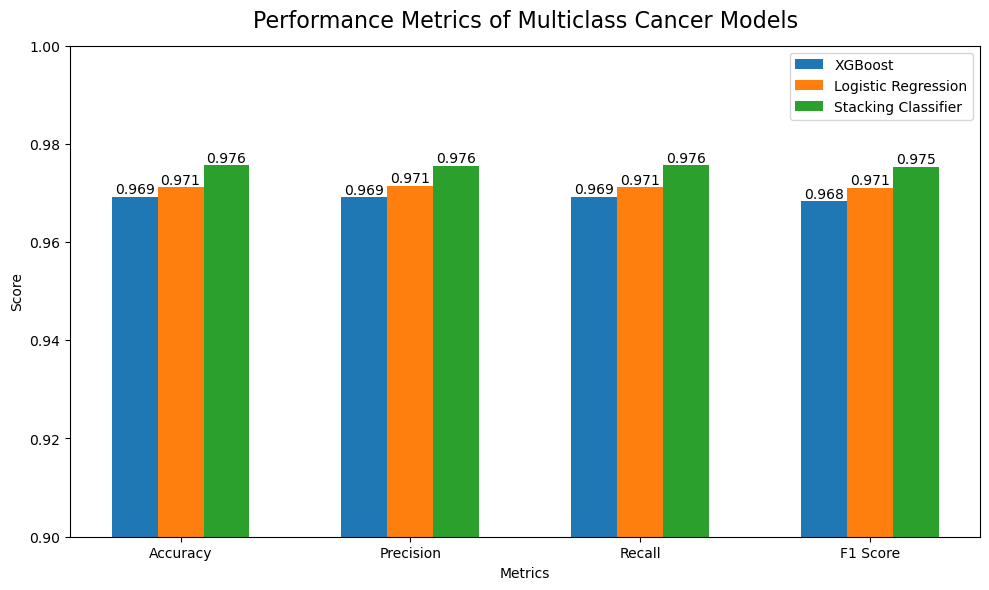

In [47]:
#Step: Imaging the classification report metrics for all three models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
#Calculate metrics for all three models

#Stacking Classifier metrics
accuracy_stackerd = accuracy_score(y_multiclass_test, stacked_multiclass_pred)
precision_stacked = precision_score(y_multiclass_test, stacked_multiclass_pred, average='weighted')
recall_stacked = recall_score(y_multiclass_test, stacked_multiclass_pred, average='weighted')
f1_stacked = f1_score(y_multiclass_test, stacked_multiclass_pred, average='weighted')

#Logistic Regression metrics
accuracy_logistic = accuracy_score(y_multiclass_test, best_logistic_multiclass.predict(X_multiclass_test_scaled))
precision_logistic = precision_score(y_multiclass_test, best_logistic_multiclass.predict(X_multiclass_test_scaled), average='weighted')
recall_logistic = recall_score(y_multiclass_test, best_logistic_multiclass.predict(X_multiclass_test_scaled), average='weighted')
f1_logistic = f1_score(y_multiclass_test, best_logistic_multiclass.predict(X_multiclass_test_scaled), average='weighted')

#XGBoost metrics
accuracy_xgb = accuracy_score(y_multiclass_test, grid_xgboost_multiclass.predict(X_multiclass_test))
precision_xgb = precision_score(y_multiclass_test, grid_xgboost_multiclass.predict(X_multiclass_test), average='weighted')
recall_xgb = recall_score(y_multiclass_test, grid_xgboost_multiclass.predict(X_multiclass_test), average='weighted')
f1_xgb = f1_score(y_multiclass_test, grid_xgboost_multiclass.predict(X_multiclass_test), average='weighted')

#Put the matrixes into a dictionary for easy imaging
np_xgboost = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
np_logistic = [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic]
np_stacked = [accuracy_stackerd, precision_stacked, recall_stacked, f1_stacked]
metrics_finished = {'XGBoost': np_xgboost,
                    'Logistic Regression': np_logistic,
                    'Stacking Classifier': np_stacked}
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = [ 'XGBoost', 'Logistic Regression', 'Stacking Classifier']


#label locations
label_locations = np.arange(len(metric_names)) 


#Plotting the resulting metrics from the three models
plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    plt.bar(label_locations + i * 0.2, metrics_finished[model], width=0.2, label=model)
plt.title('Performance Metrics of Multiclass Cancer Models', fontsize=16, y=1.02)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(label_locations + 0.2, metric_names)
plt.ylim(0.90, 1.00)
#Adding value bars to each bar 
for i in range(len(metric_names)):
    for j, model in enumerate(model_names):
        plt.text(label_locations[i] + j * 0.2, metrics_finished[model][i], f"{metrics_finished[model][i]:.3f}", ha='center', va='bottom', fontsize=10, color='black')
plt.legend()
plt.tight_layout()
#plt.savefig('multiclass_cancer_model_performance_metrics.png')
plt.show()




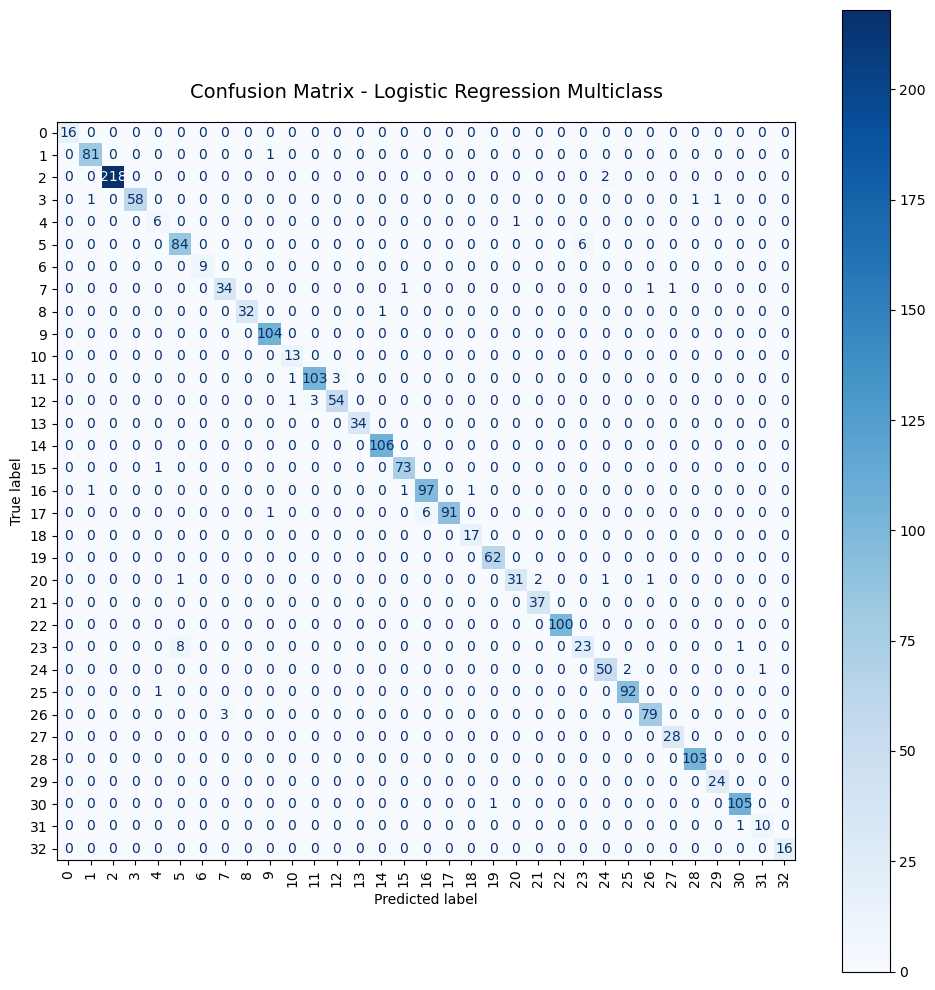

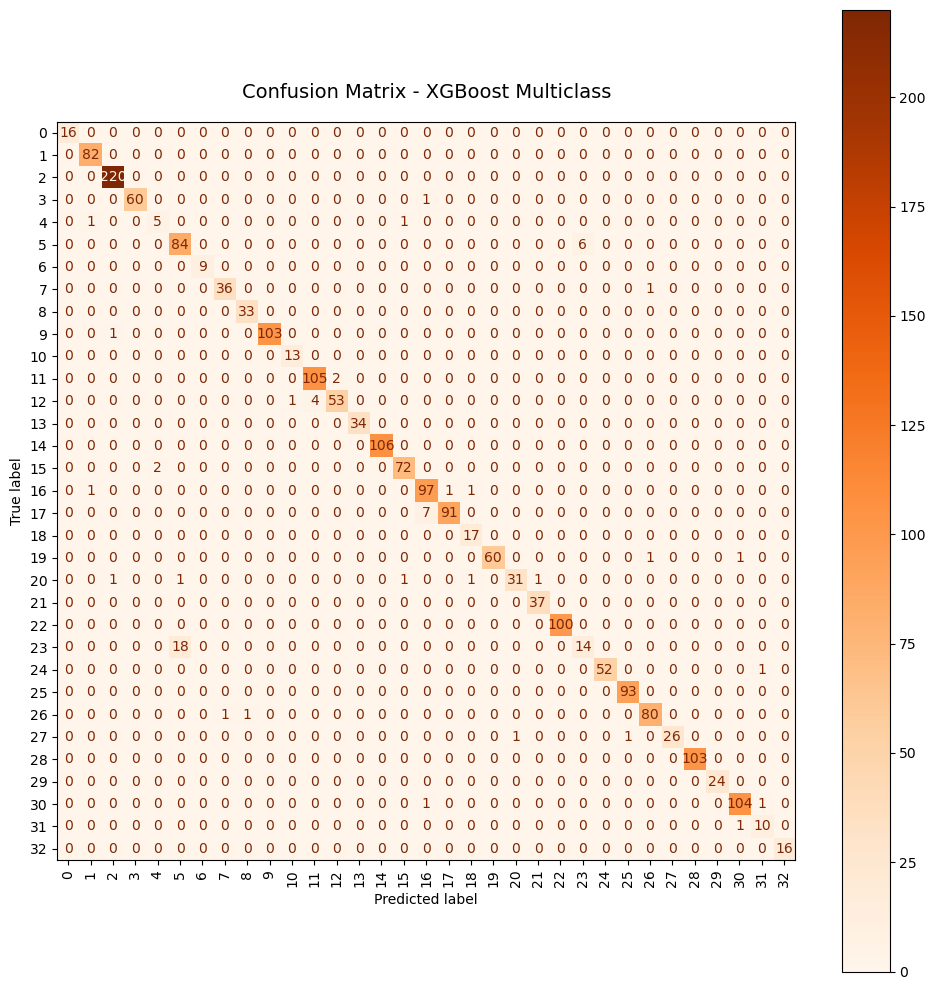

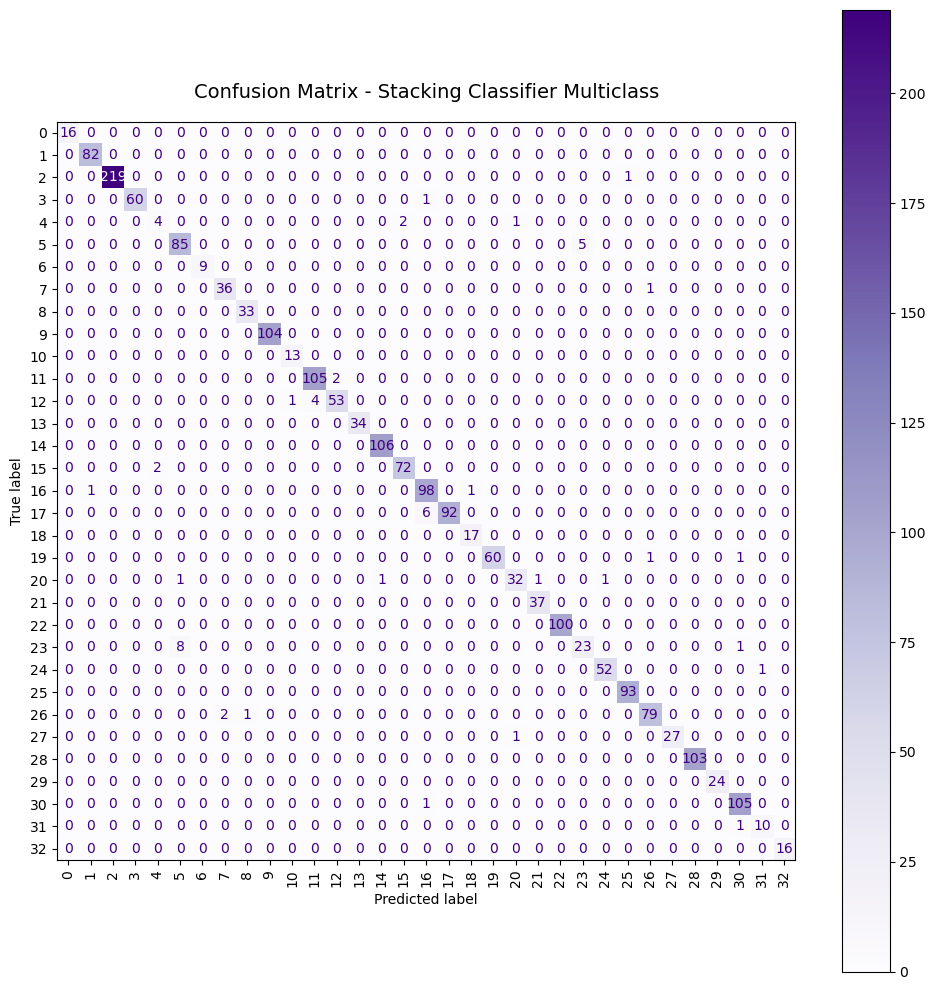

In [ ]:
#Step: Confusion matrices for all three multiclass models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#Create confusion matrices for all three models separately 
cancer_class_labels = [str(label) for label in np.unique(y_multiclass_test)]

#Logistic Regression Confusion Matrix
cm_logistic_multiclass = confusion_matrix(y_multiclass_test, logistic_multiclass_pred)

#XGBoost Confusion Matrix
cm_xgb_multiclass = confusion_matrix(y_multiclass_test, xgb_multiclass_pred)

#Stacking Classifier Confusion Matrix
cm_stacking_multiclass = confusion_matrix(y_multiclass_test, stacked_multiclass_pred)

#Plotting the confusion matrices

#Plotting the Logistic Regression Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_multiclass, display_labels=cancer_class_labels)
disp_logistic.plot(ax=ax, cmap='Blues', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Logistic Regression Multiclass', fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_logistic_multiclass.png')
plt.show()

#Plotting the XGBoost Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_multiclass, display_labels=cancer_class_labels)
disp_xgb.plot(ax=ax, cmap='Oranges', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - XGBoost Multiclass', fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_xgboost_multiclass.png')
plt.show()

#Stacking Classifier Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=cm_stacking_multiclass, display_labels=cancer_class_labels)
disp_stacking.plot(ax=ax, cmap='Purples', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Stacking Classifier Multiclass', fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_stacking_multiclass.png')
plt.show()


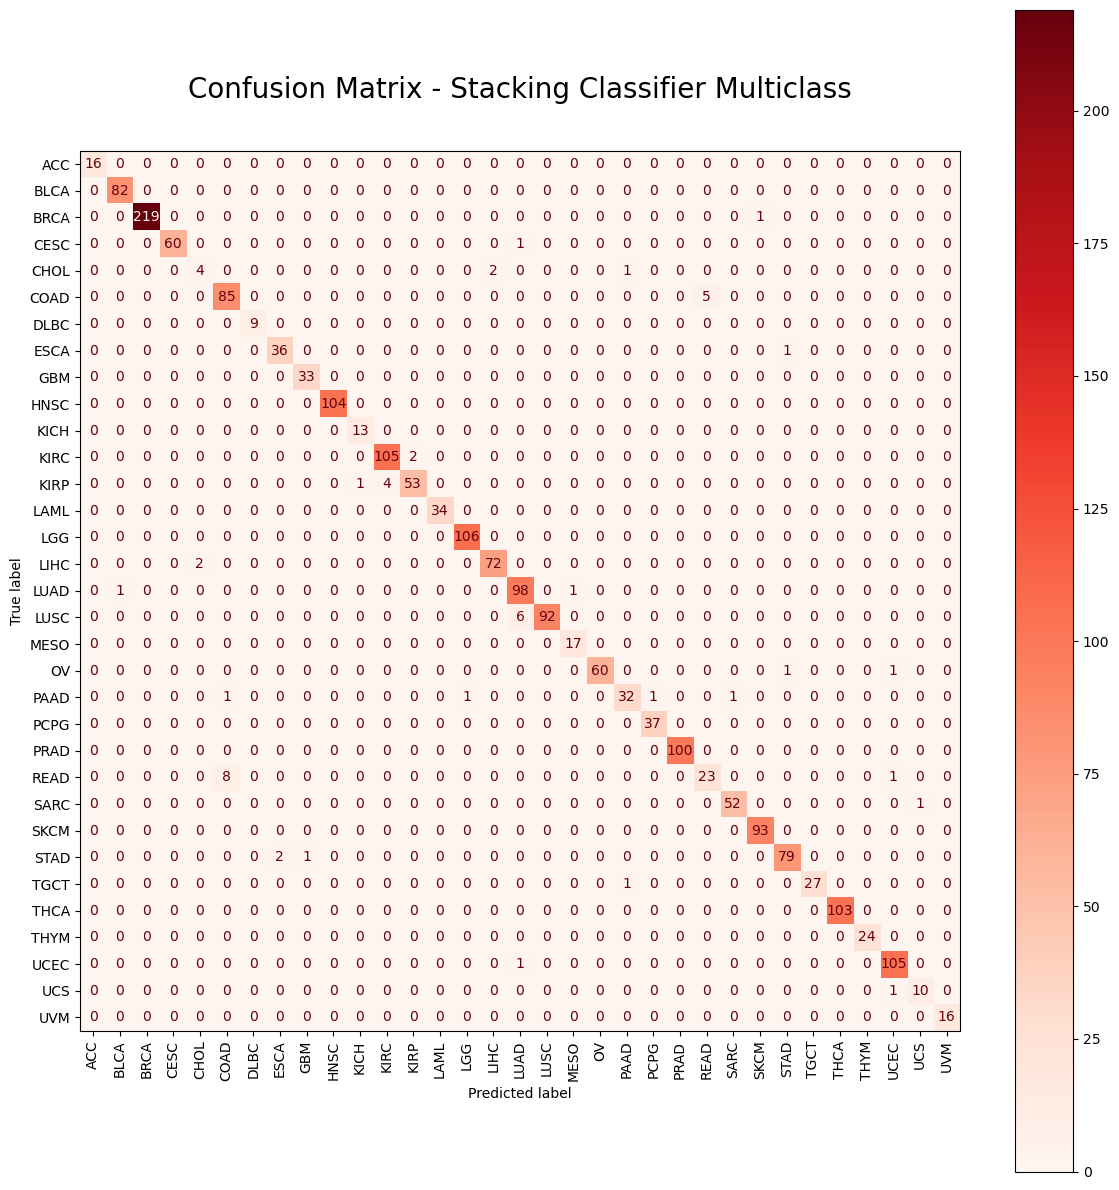

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Confusion matrix with actual cancer names from the originaly saved map to the data:
#Loading map 
loaded_cancer_type_map = joblib.load('cancer_type_decoder_map.joblib')
finished_cancer_labels = []
#Get the key with the value from the loaded map
reversed_cancer_type_map = {v: k for k, v in loaded_cancer_type_map.items()}

finished_cancer_labels = []
cancer_class_number_labels = []
for label in np.unique(y_multiclass_test):
    cancer_class_number_labels.append(str(label))
    
for label in cancer_class_number_labels:
    finished_cancer_labels.append(reversed_cancer_type_map[int(label)])
    
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute confusion matrix
cm_stacking_multiclass = confusion_matrix(y_multiclass_test, stacked_multiclass_pred)

#Create a larger figure and pass the axis
fig, ax = plt.subplots(figsize=(12, 12))

# reate the display object and plot it on the given axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacking_multiclass, display_labels=finished_cancer_labels)
disp.plot(ax=ax, cmap='Reds', values_format='d', xticks_rotation=90)
# Update title and save
ax.set_title('Confusion Matrix - Stacking Classifier Multiclass', fontsize=20, y=1.05)
plt.tight_layout()
plt.savefig('confusion_matrix_stacking_multiclass.png')
plt.show()


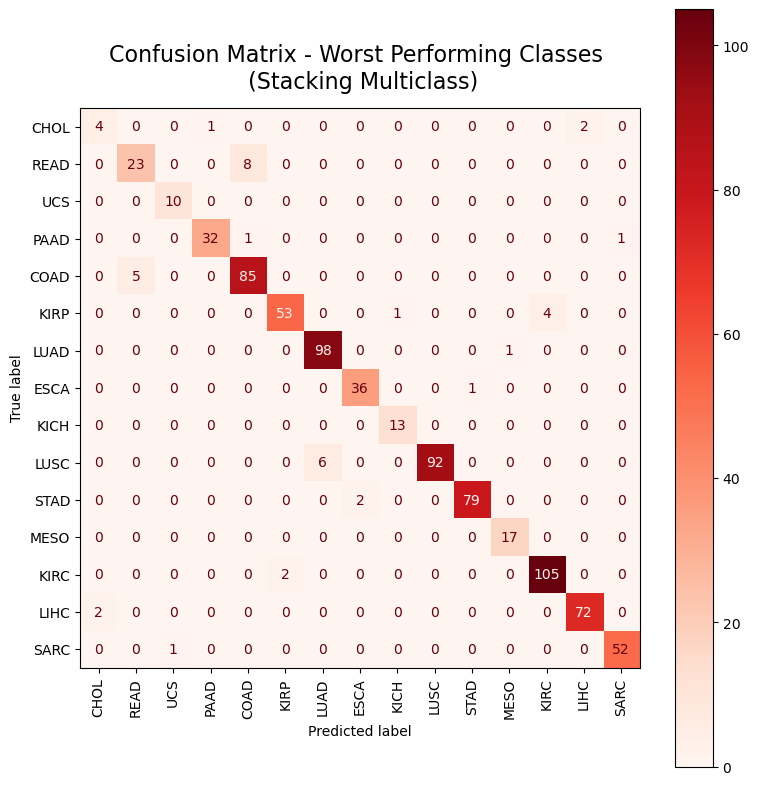

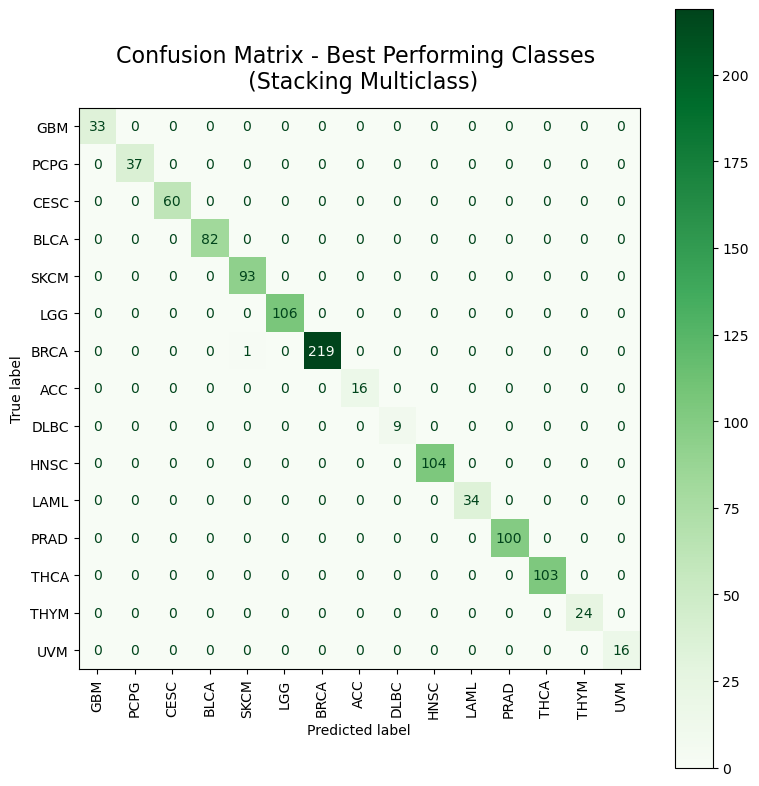

In [ ]:
#Creating a confusion matrix of only the worst performer classes from the stacking model

#Step: Get the F1-scores for each class 
report_dict = classification_report(y_multiclass_test, stacked_multiclass_pred, output_dict=True)
f1_scores = {}
for label in report_dict:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        f1_scores[label] = report_dict[label]['f1-score']
        
#Step: Sort by worst F1-score
sorted_classes = sorted(f1_scores, key=f1_scores.get)
worst_classes = sorted_classes[:15]  #Getting the 15 worst performing classes
best_classes = sorted_classes[-15:] #Getting the 15 best performing classes
worst_classes_indexes = [int(label) for label in worst_classes]
best_classes_indexes = [int(label) for label in best_classes]
worst_classes_labels = []
best_classes_labels = []
for i in range(len(worst_classes_indexes)):
    worst_classes_labels.append(reversed_cancer_type_map[worst_classes_indexes[i]])
    best_classes_labels.append(reversed_cancer_type_map[best_classes_indexes[i]])
    
best_cm_stacking_multiclass = confusion_matrix(y_multiclass_test, stacked_multiclass_pred, labels=best_classes_indexes)
worst_cm_stacking_multiclass = confusion_matrix(y_multiclass_test, stacked_multiclass_pred, labels=worst_classes_indexes)

#Plotting the worst performing classes 
fig, ax = plt.subplots(figsize=(8, 8))
disp_worst = ConfusionMatrixDisplay(confusion_matrix=worst_cm_stacking_multiclass, display_labels=worst_classes_labels)
disp_worst.plot(ax=ax, cmap='Reds', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Worst Performing Classes \n (Stacking Multiclass)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_worst_performing_classes_stacking_multiclass.png')
plt.show()

#Plotting the best performing classes
fig, ax = plt.subplots(figsize=(8, 8))
disp_best = ConfusionMatrixDisplay(confusion_matrix=best_cm_stacking_multiclass, display_labels=best_classes_labels)
disp_best.plot(ax=ax, cmap='Greens', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Best Performing Classes \n (Stacking Multiclass)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_best_performing_classes_stacking_multiclass.png')
plt.show()


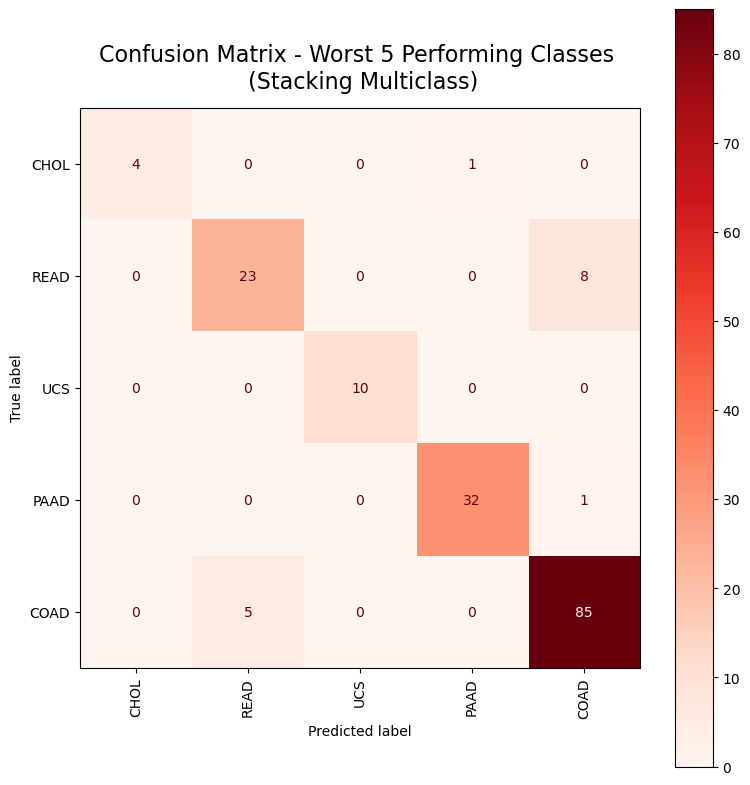

In [102]:
#Plotting the worst 5 performing classes
worst_classes_labels = worst_classes_labels[:5]  # Getting only the worst 5 classes
worst_classes_indexes = worst_classes_indexes[:5]  # Getting only the worst 5 class indexes

fig, ax = plt.subplots(figsize=(8, 8))
disp_worst_5 = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_multiclass_test, stacked_multiclass_pred, labels=worst_classes_indexes),
    display_labels=worst_classes_labels
)
disp_worst_5.plot(ax=ax, cmap='Reds', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Worst 5 Performing Classes \n (Stacking Multiclass)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_worst_5_performing_classes_stacking_multiclass.png')
plt.show()



#### Worst 10 and Best 10 Performing Classes in the Multiclass Model
#### Shows that CHOL/READ/UCS are the worst performing classes, they are also the ones with the least amount of data and the most similar cancers in terms of biological similarity. This leaves room for improvement, starting by gathering more data for those classes that can be found in other TCGA datasets.

In [101]:
#Print the worst 10 performer
print("Worst Performing Classes and their F1-scores:")
for label in worst_classes[0:10]:
    print(f"Class: {reversed_cancer_type_map[int(label)]}, F1-score: {f1_scores[label]:.4f}")

Worst Performing Classes and their F1-scores:
Class: CHOL, F1-score: 0.6154
Class: READ, F1-score: 0.7667
Class: UCS, F1-score: 0.9091
Class: PAAD, F1-score: 0.9143
Class: COAD, F1-score: 0.9239
Class: KIRP, F1-score: 0.9381
Class: LUAD, F1-score: 0.9515
Class: ESCA, F1-score: 0.9600
Class: KICH, F1-score: 0.9630
Class: LUSC, F1-score: 0.9684


In [ ]:
#Print the best 10 performers
print("\nBest Performing Classes and their F1-scores:")
for label in best_classes[-10:]:
    print(f"Class: {reversed_cancer_type_map[int(label)]}, F1-score: {f1_scores[label]:.4f}")


Best Performing Classes and their F1-scores:
Class: LGG, F1-score: 0.9953
Class: BRCA, F1-score: 0.9977
Class: ACC, F1-score: 1.0000
Class: DLBC, F1-score: 1.0000
Class: HNSC, F1-score: 1.0000
Class: LAML, F1-score: 1.0000
Class: PRAD, F1-score: 1.0000
Class: THCA, F1-score: 1.0000
Class: THYM, F1-score: 1.0000
Class: UVM, F1-score: 1.0000



--------------------
## END OF NOTEBOOK ##
#### **Final Note:** The overall best model is the stacking model for both the binary and the multiclass models. The binary has 99% accuracy on the test set and the multiclass has 97.6% accuracy on the test set. The models are saved using joblib to be used in the grading_document.ipynb for evaluation on the test split or any other dataset that has the same format as the training data. The models, selectors, variables, test set, and other data needed for the grading_document.ipynb are saved using joblib.